# House Prices: Advanced Regression Techniques

By Emily Strong 

This data is from the House Prices: Advanced Regression Techniques Kaggle competition:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques. The data dictionary is in the file 'data_description.txt'. The competition uses the [Ames Iowa Housing data set](http://www.amstat.org/publications/jse/v19n3/decock.pdf).


# Part A

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pyplot import cm
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Set max columns
pd.set_option('display.max_columns', 100)


## Import Data
First I import the data set and get a general sense of it.

In [2]:
data = pd.read_csv('train.csv', header=0)

In [3]:
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are 79 features not including Id and SalePrice, and it is a mix of categorical and numeric features.

# Data Cleansing
## Missing Values
First I calculate the percent missing data for each column and plot it.

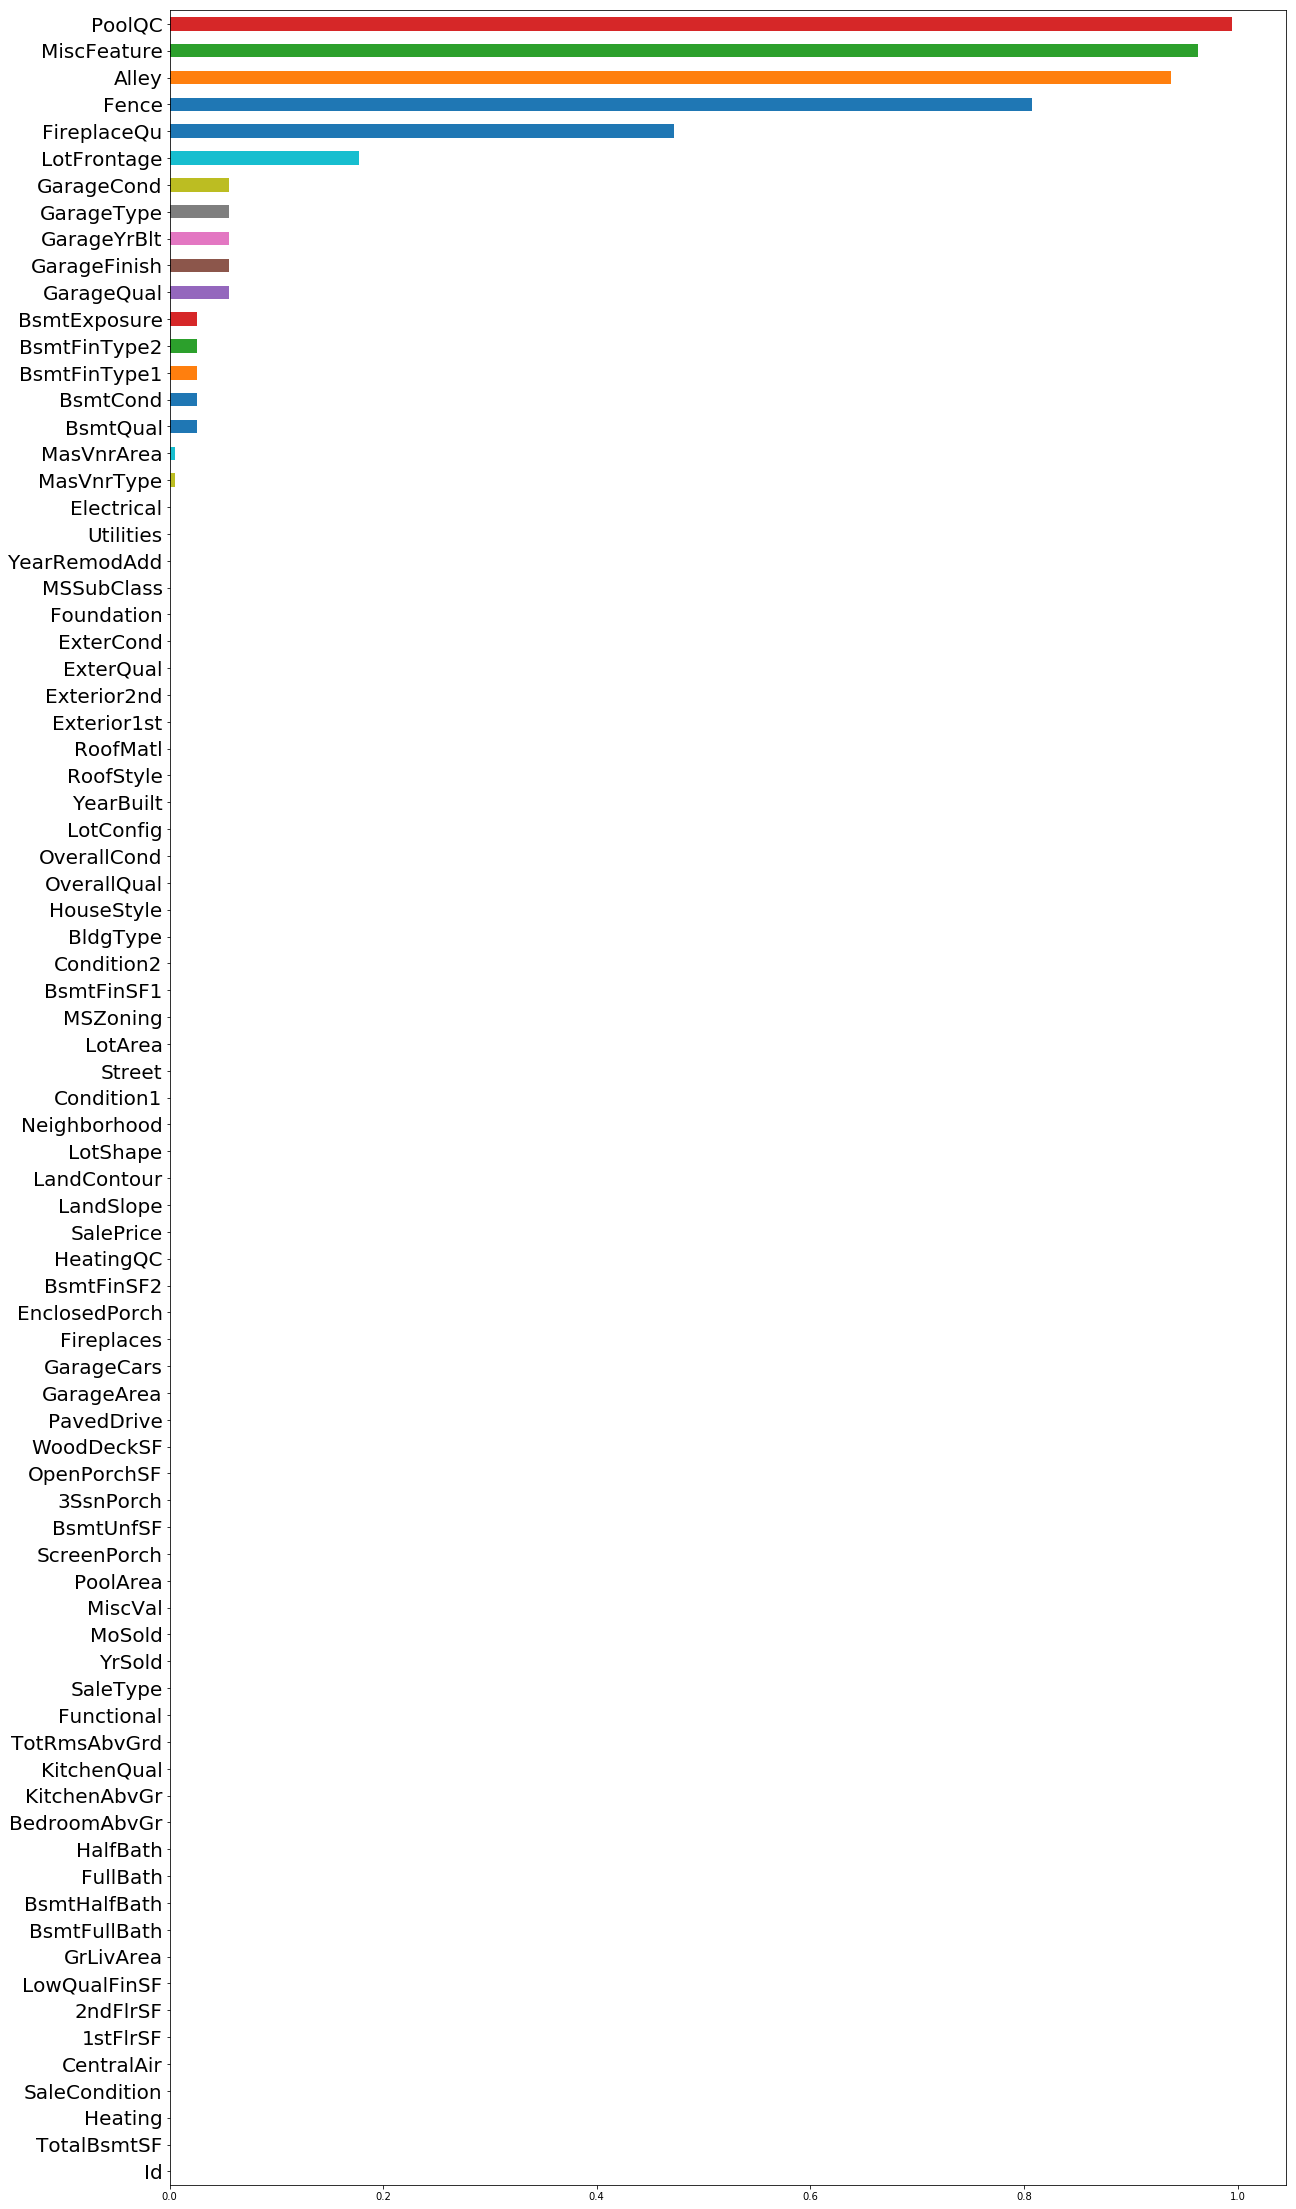

In [6]:
missing_percents = (len(data.index) - data.count())/len(data.index)
#missing_percents = missing_percents[missing_percents > 0]
missing_percents.sort_values(inplace=True)
#temp = pd.DataFrame(missing_percents, columns=['feature'])

missing_percents.plot.barh(figsize=(20,40))
plt.yticks(size=20)
plt.show()

The majority of columns do not have missing data, and those that do generally have low amounts. I will use a 75% missing data cutoff to remove features during data cleansing.

In [7]:
drops = missing_percents[missing_percents > .75]
drops

Fence          0.807534
Alley          0.937671
MiscFeature    0.963014
PoolQC         0.995205
dtype: float64

## Inappropriate Values
First I check the field to be predicted. While I won't remove outliers from this column, it will help to know if there are any extreme values.

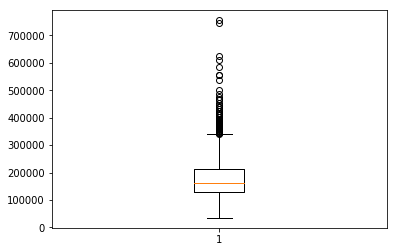

In [8]:
plt.close('all')
plt.boxplot(data['SalePrice'])
plt.show()

Next I look at the numeric columns. I have identified 28 of those not eliminated for missing values as containing continuous or discrete data (not including ordinal categories).

In [9]:
numeric = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2',
           'BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces',
           'FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','KitchenAbvGr',
           'LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal','OpenPorchSF',
           'PoolArea','ScreenPorch','TotalBsmtSF','TotRmsAbvGrd','WoodDeckSF']

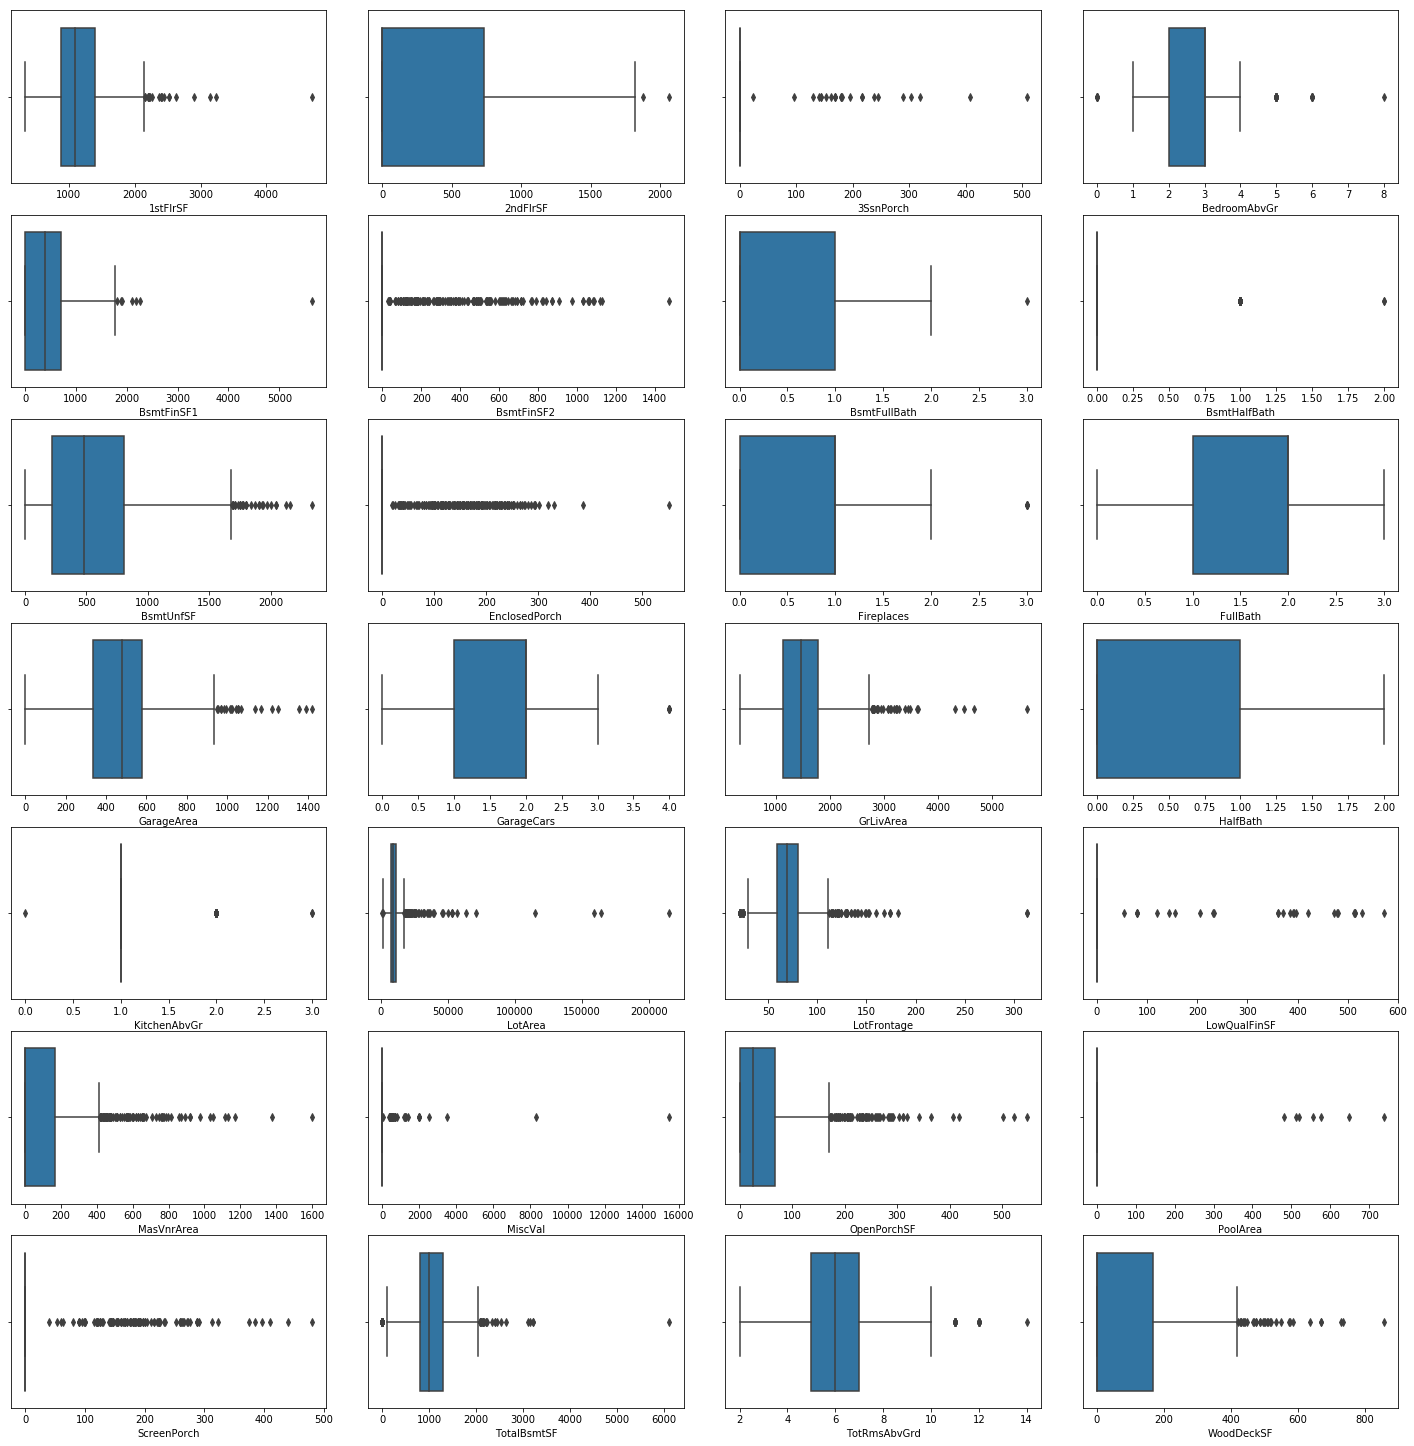

In [10]:
data_num = data[numeric]

plt.close('all')
fig, axes = plt.subplots(7, 4, figsize=(20, 20))
columns = list(data_num)
plt.tight_layout()
for i, ax in enumerate(fig.axes):
    if i < len(list(data_num)):
        sns.boxplot(x=data_num.columns[i], data=data_num, ax=ax)
        
plt.show()     


Though most columns have outliers, several have much longer tails in proproprition to the values or large gaps between the furthest outlier and the rest of the data. Specifically, let's look at lot area, first floor square footage, and basement square footage. Miscellanious value is also noteworthy, and should be examined in juxtaposition to the miscellanous features column.

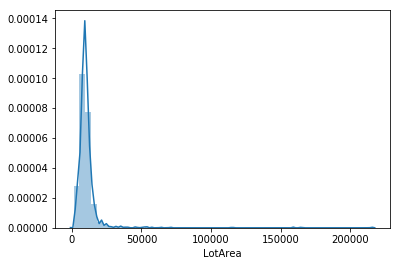

In [11]:
plt.close('all')
sns.distplot(data['LotArea'])
plt.show()

The data has a very long tail, with the slope tapering off around 25,000. There also appear to be zeros, so we should look directly at the numbers to check:

In [12]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

The skew of the tail and resulting scale of the plot is why it erroneously appears there are 0s. Next we examine the first floor square footage: 

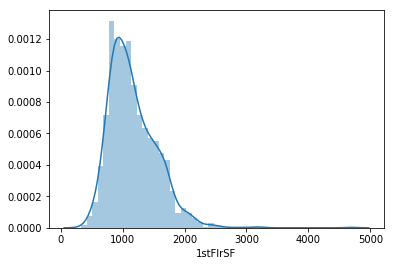

In [13]:
plt.close('all')
sns.distplot(data['1stFlrSF'])
plt.show()

Another long tail, this one appears to have the slope taper off around 2500. 

Next is basement square footage:

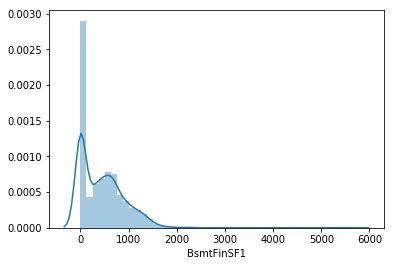

In [14]:
plt.close('all')
sns.distplot(data['BsmtFinSF1'])
plt.show()

The basement square footage levels off somewhere between 1500 and 2000. We'll treat it as 1750.

Finally there are the miscellanious feature values:

In [15]:
data.groupby('MiscFeature')['MiscVal'].value_counts()

MiscFeature  MiscVal
Gar2         8300        1
             15500       1
Othr         0           1
             3500        1
Shed         400        11
             500         8
             700         5
             450         4
             600         4
             2000        3
             480         2
             1200        2
             0           1
             54          1
             350         1
             560         1
             620         1
             800         1
             1150        1
             1300        1
             1400        1
             2500        1
TenC         2000        1
Name: MiscVal, dtype: int64

Most of these features add a small amount to the value of the home. A second garage has a much larger effect, however since only two houses have this it is not a useful feature for developing a model.

In addition to outliers, most of the numeric features have zeroes. For some this is logical (e.g. we can assume any home with a pool square footage of 0 doesn't have a pool). The ones that require further investigation or explanation:
* There are 4 separate bathroom features for full and half baths for both above grade (ground) floors and basements. Each of these has 0s, but we need to check that every house has at least one bathroom.
* Bedrooms above ground - These may be [raised ranch](http://houseplansandmore.com/resource_center/raised-ranch-homes.aspx) style homes. But we should verify that this is consistent with other features of home.
* Kitchens above ground - Again, these may be raised ranch homes.

In [16]:
# Bathrooms
def fullbathrooms(x):
    return x['BsmtFullBath'] + x['FullBath']

data['FullBathNet'] = data.apply(lambda x: fullbathrooms(x), axis=1)
data['FullBathNet'].describe()

count    1460.000000
mean        1.990411
std         0.732046
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: FullBathNet, dtype: float64

In [17]:
def halfbathrooms(x):
    return x['BsmtHalfBath'] + x['HalfBath']

data['HalfBathNet'] = data.apply(lambda x: halfbathrooms(x), axis=1)
data['HalfBathNet'].describe()

count    1460.000000
mean        0.440411
std         0.554016
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: HalfBathNet, dtype: float64

The 0s for the net half baths is reasonable, but for the full baths need to be treated as missing values. 

As for the kitchens and bedrooms, these can be examined together:

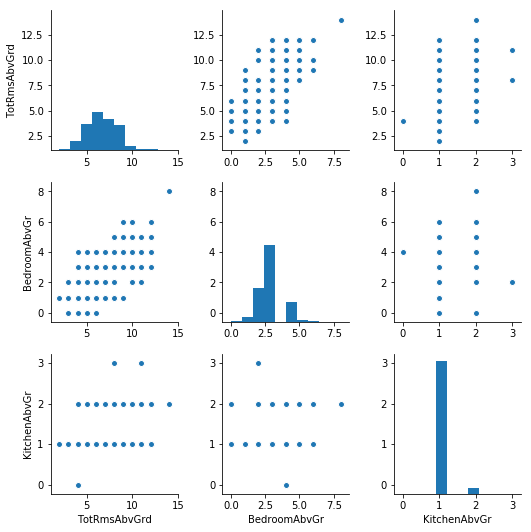

In [18]:
above = ['TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr']

plt.close('all')
sns.pairplot(data[above])
plt.show()

There is a general trend that the more above ground rooms there are, the more bedrooms are above ground, and the 0 for kitchens above ground corresponds to a very small number of total rooms above the basement. The 0s are thus most likely raised ranch homes with the kitchen in the basement.

## Cleansing

First drop columns that have 75% or more missing data, as well as the ID column

In [19]:
columns = drops.index
for c in columns:
    data.drop(c, axis=1, inplace=True)

data.drop('Id', axis=1, inplace=True)


Next identify the remaining columns with missing values

In [20]:
fills = missing_percents[missing_percents>0]
fills = fills[fills<.75]
fills

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtFinType2    0.026027
BsmtExposure    0.026027
GarageQual      0.055479
GarageFinish    0.055479
GarageYrBlt     0.055479
GarageType      0.055479
GarageCond      0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
dtype: float64

Most of these have small values and can be reasonably have median substitutions for the numeric values, and mode substitutions for the categorical.

In [21]:
modes = ['Electrical','MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
         'BsmtExposure','GarageQual','GarageFinish','GarageYrBlt','GarageType',
         'GarageCond']
medians = ['MasVnrArea','LotFrontage']

for m in modes:
    values = data[m].mode()
    data[m].fillna(values[0], inplace=True)

for m in medians:
    data[m].fillna(data[m].median(), inplace=True)


The fireplace quality feature requires a closer look. Do the missing values correspond to homes that don't have a fireplace?

In [22]:
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [23]:
data.groupby('Fireplaces')['FireplaceQu'].value_counts()

Fireplaces  FireplaceQu
1           Gd             324
            TA             259
            Fa              28
            Po              20
            Ex              19
2           Gd              54
            TA              53
            Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
Name: FireplaceQu, dtype: int64

There are no mmissing fireplace quality codes for homes that have fireplaces, so I can use 'None' to fill the missing values.

In [24]:
data['FireplaceQu'].fillna('None', inplace=True)

Finally, there are the previously identified outliers to be dealt with:

In [25]:
data.loc[data['LotArea'] > 25000, 'LotArea'] = data['LotArea'].median()
data.loc[data['1stFlrSF'] > 2500, '1stFlrSF'] = data['1stFlrSF'].median()
data.loc[data['BsmtFinSF1'] > 1750, 'BsmtFinSF1'] = data['BsmtFinSF1'].median()
data.loc[data['FullBathNet'] == 0, 'FullBathNet'] = data['FullBathNet'].median()

In [26]:
data[['LotArea','1stFlrSF','BsmtFinSF1','FullBathNet']].describe()

,LotArea,1stFlrSF,BsmtFinSF1,FullBathNet
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,9549.516781,1153.024658,432.351370,1.991781
std,3619.695408,359.415582,421.672999,0.730188
min,1300.000000,334.000000,0.000000,1.000000
25%,7553.500000,882.000000,0.000000,1.000000
50%,9477.750000,1086.500000,383.250000,2.000000
75%,11340.250000,1382.250000,700.500000,2.000000
max,25000.000000,2444.000000,1721.000000,6.000000


While the data is still skewed, in comparing the previous "describe" function for Lot Area, the standard deviation has decreased to about 1/3 of its previous value.

## Feature Distributions

Next I look at the data distrubutions, including the categorical data which was not part of the outlier analysis.

First there is the sale price that is to be predicted:

In [27]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

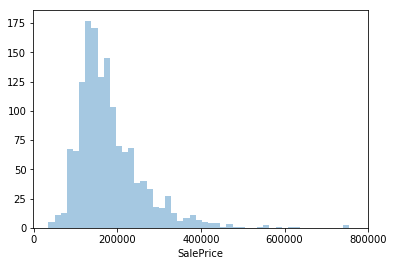

In [28]:
plt.close('all')
sns.distplot(data['SalePrice'],  kde = False)
plt.xticks(range(0, 900000, 200000))
plt.show()

The date is skewed with a long tail. More than half the homes are valued under $200k.

In [29]:
data_num.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF,TotRmsAbvGrd,WoodDeckSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,0.613014,1.565068,472.980137,1.767123,1515.463699,0.382877,1.046575,10516.828082,70.049958,5.844521,103.685262,43.489041,46.660274,2.758904,15.060959,1057.429452,6.517808,94.244521
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,0.644666,0.550916,213.804841,0.747315,525.480383,0.502885,0.220338,9981.264932,24.284752,48.623081,181.066207,496.123024,66.256028,40.177307,55.757415,438.705324,1.625393,125.338794
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,0.000000,1.000000,334.500000,1.000000,1129.500000,0.000000,1.000000,7553.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,795.750000,5.000000,0.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,1.000000,2.000000,480.000000,2.000000,1464.000000,0.000000,1.000000,9478.500000,69.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,991.500000,6.000000,0.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,1.000000,2.000000,576.000000,2.000000,1776.750000,1.000000,1.000000,11601.500000,80.000000,0.000000,166.000000,0.000000,68.000000,0.000000,0.000000,1298.250000,7.000000,168.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,3.000000,3.000000,1418.000000,4.000000,5642.000000,2.000000,3.000000,215245.000000,313.000000,572.000000,1600.000000,15500.000000,547.000000,738.000000,480.000000,6110.000000,14.000000,857.000000


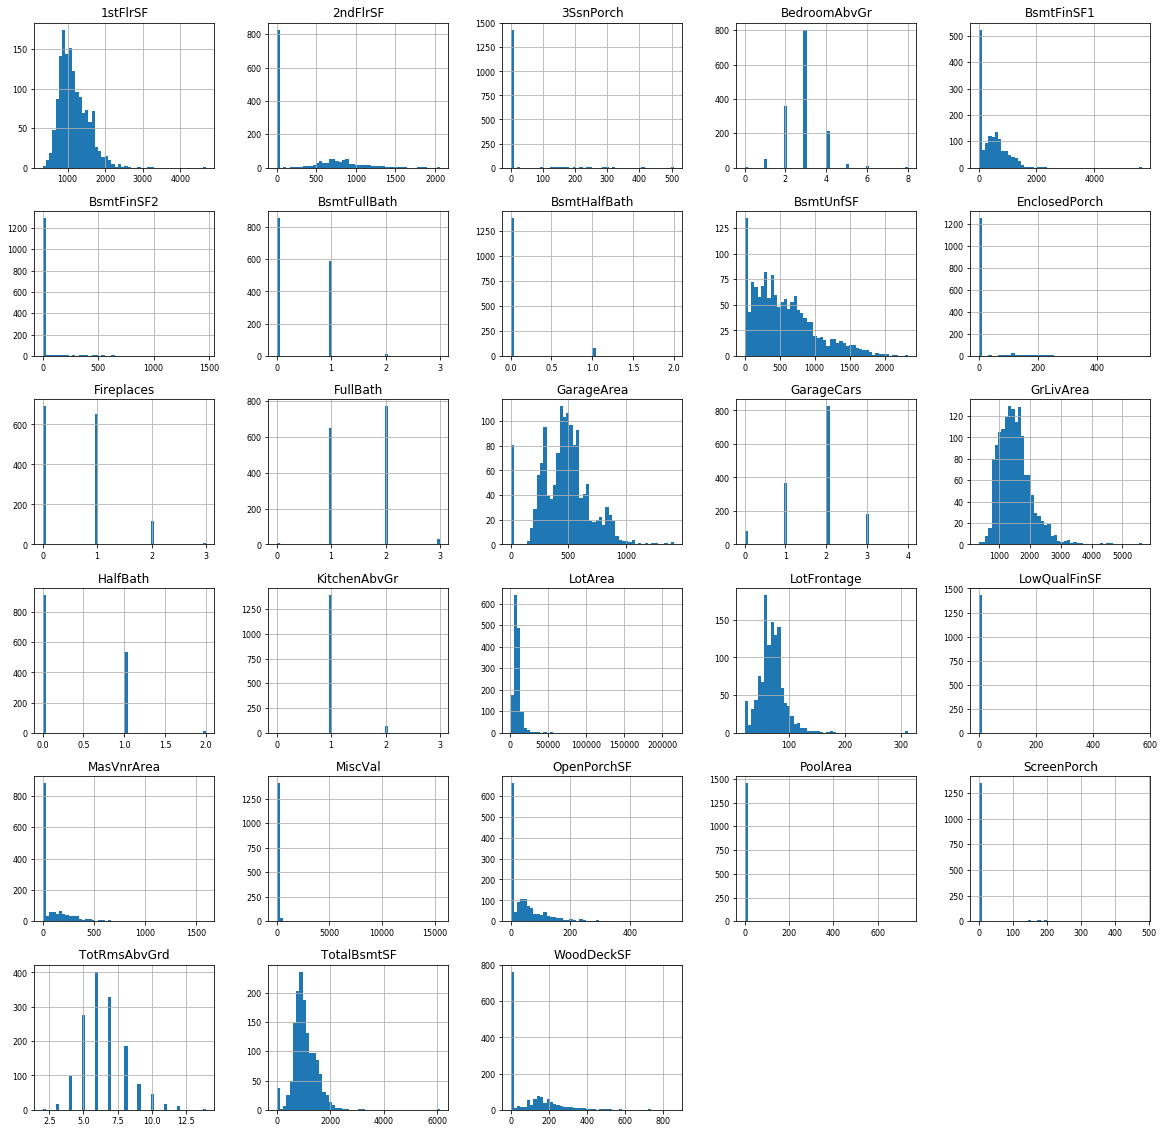

In [30]:
plt.close('all')
data_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

As with the sale price, many of these are skewed, suggesting the homes in the first two quartiles are smaller with fewer rooms, less square footage, etc.

A large number have 0s, specifically: second floor square footage, the three different porch square footages, the two measures of finished basement square footage as well as unfinished basement square footage, bathrooms as divided into basement vs above ground and half vs full, the garage square footage and capacity, the fire place count, the pool and deck square footages, the masonry veneer area, and the miscellaneous values. For each of these I assume a 0 is a real value, since a house may not have the feature.

Next I look at the categorical features. Because of the quantity, I have divided them into two parts.

In [31]:
cat1 = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
       'CentralAir','Condition1','Condition2','Electrical','ExterCond','Exterior1st',
       'Exterior2nd','ExterQual','Foundation','Functional','GarageCond','GarageFinish',
       'GarageQual','GarageType','GarageYrBlt','Heating','HeatingQC','HouseStyle']
cat2=['KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
       'MasVnrType','MoSold','MSSubClass','MSZoning','Neighborhood',
       'OverallCond','OverallQual','PavedDrive','RoofMatl','RoofStyle',
       'SaleCondition','SaleType','Street','Utilities','YearBuilt','YearRemodAdd','YrSold']
    
data_cat1= data[cat1]
data_cat2 = data[cat2]

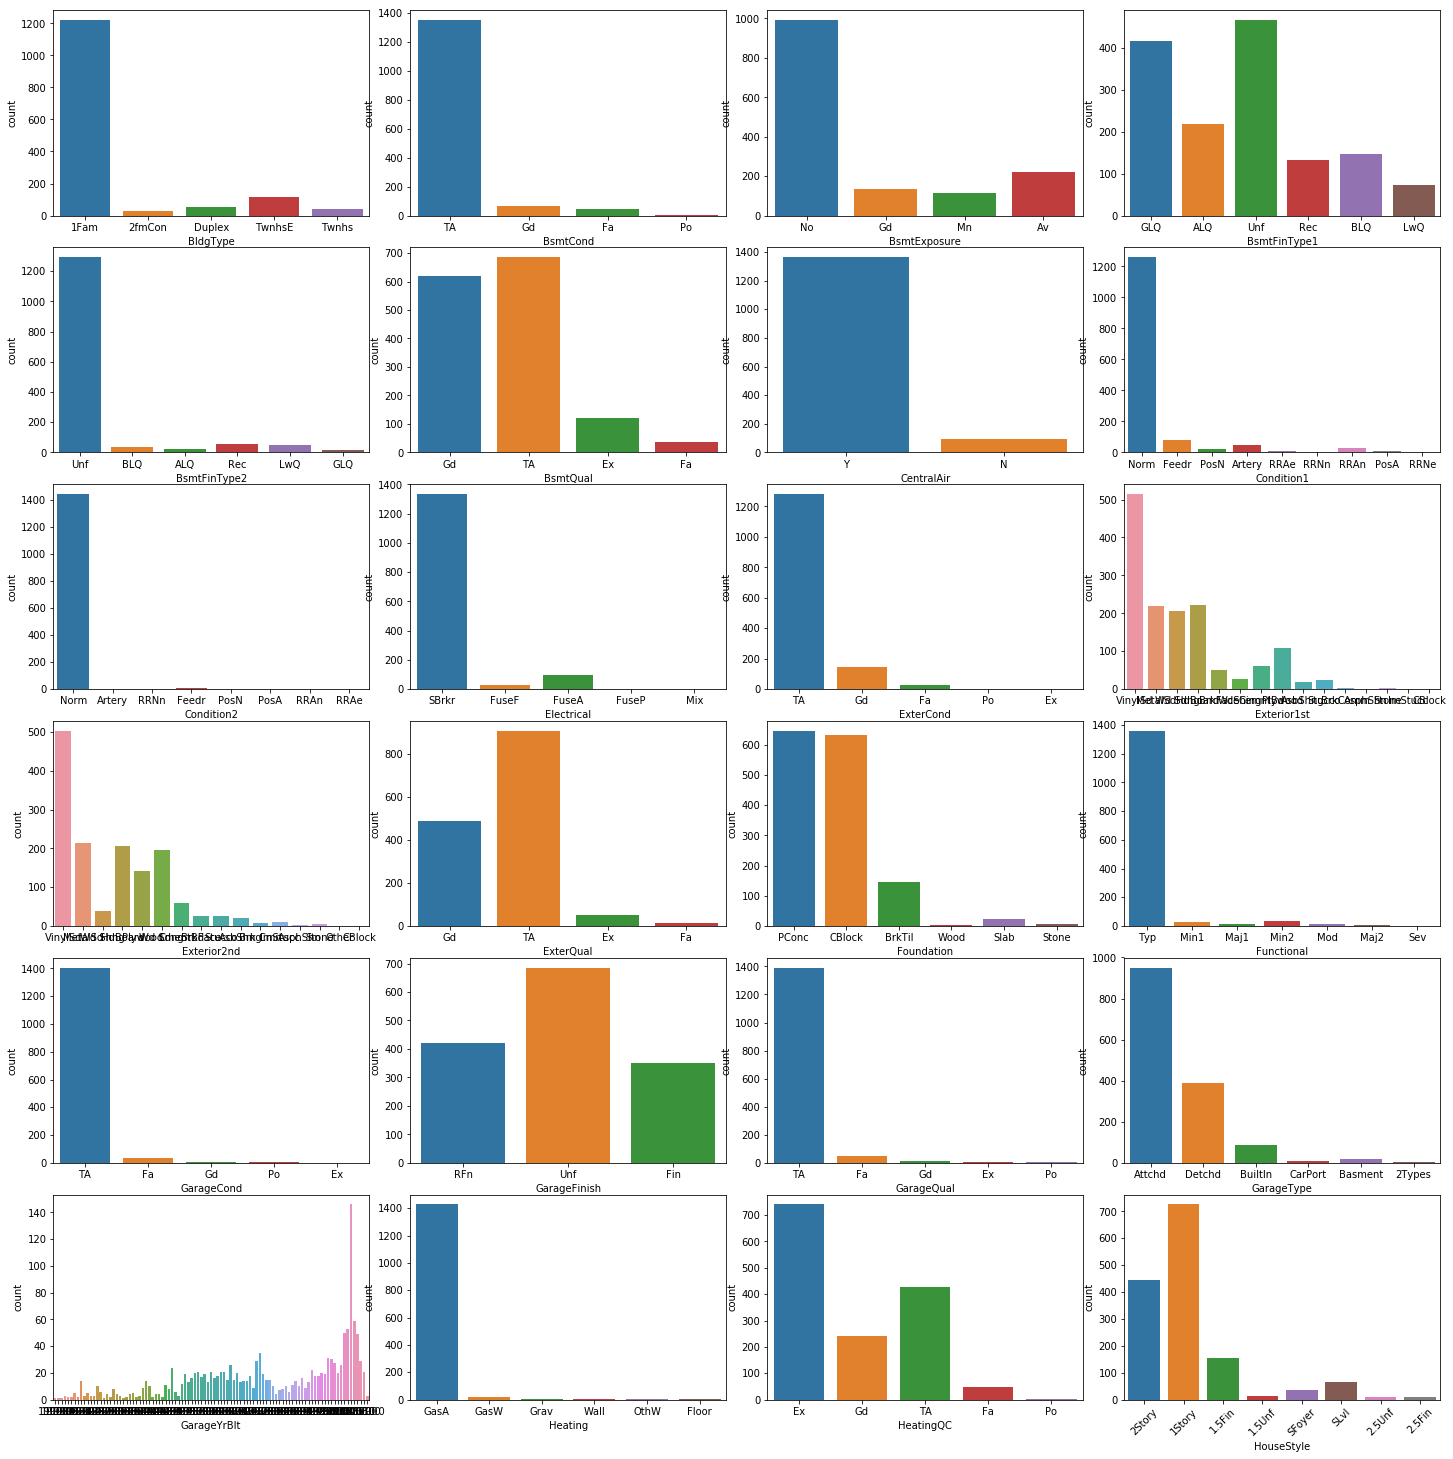

In [32]:
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.xticks(rotation=45) 
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat1):
        sns.countplot(x=data_cat1.columns[i], data=data_cat1, ax=ax)

plt.show()      



All of them have 1-2 prominent categories, which makes sense since many of them are common home features such as forced air gas heating. Quality and contidion metrics general favor the average/typical metric, which also makes sense. Interestingly, a large proportion of garages appear to be recently built.

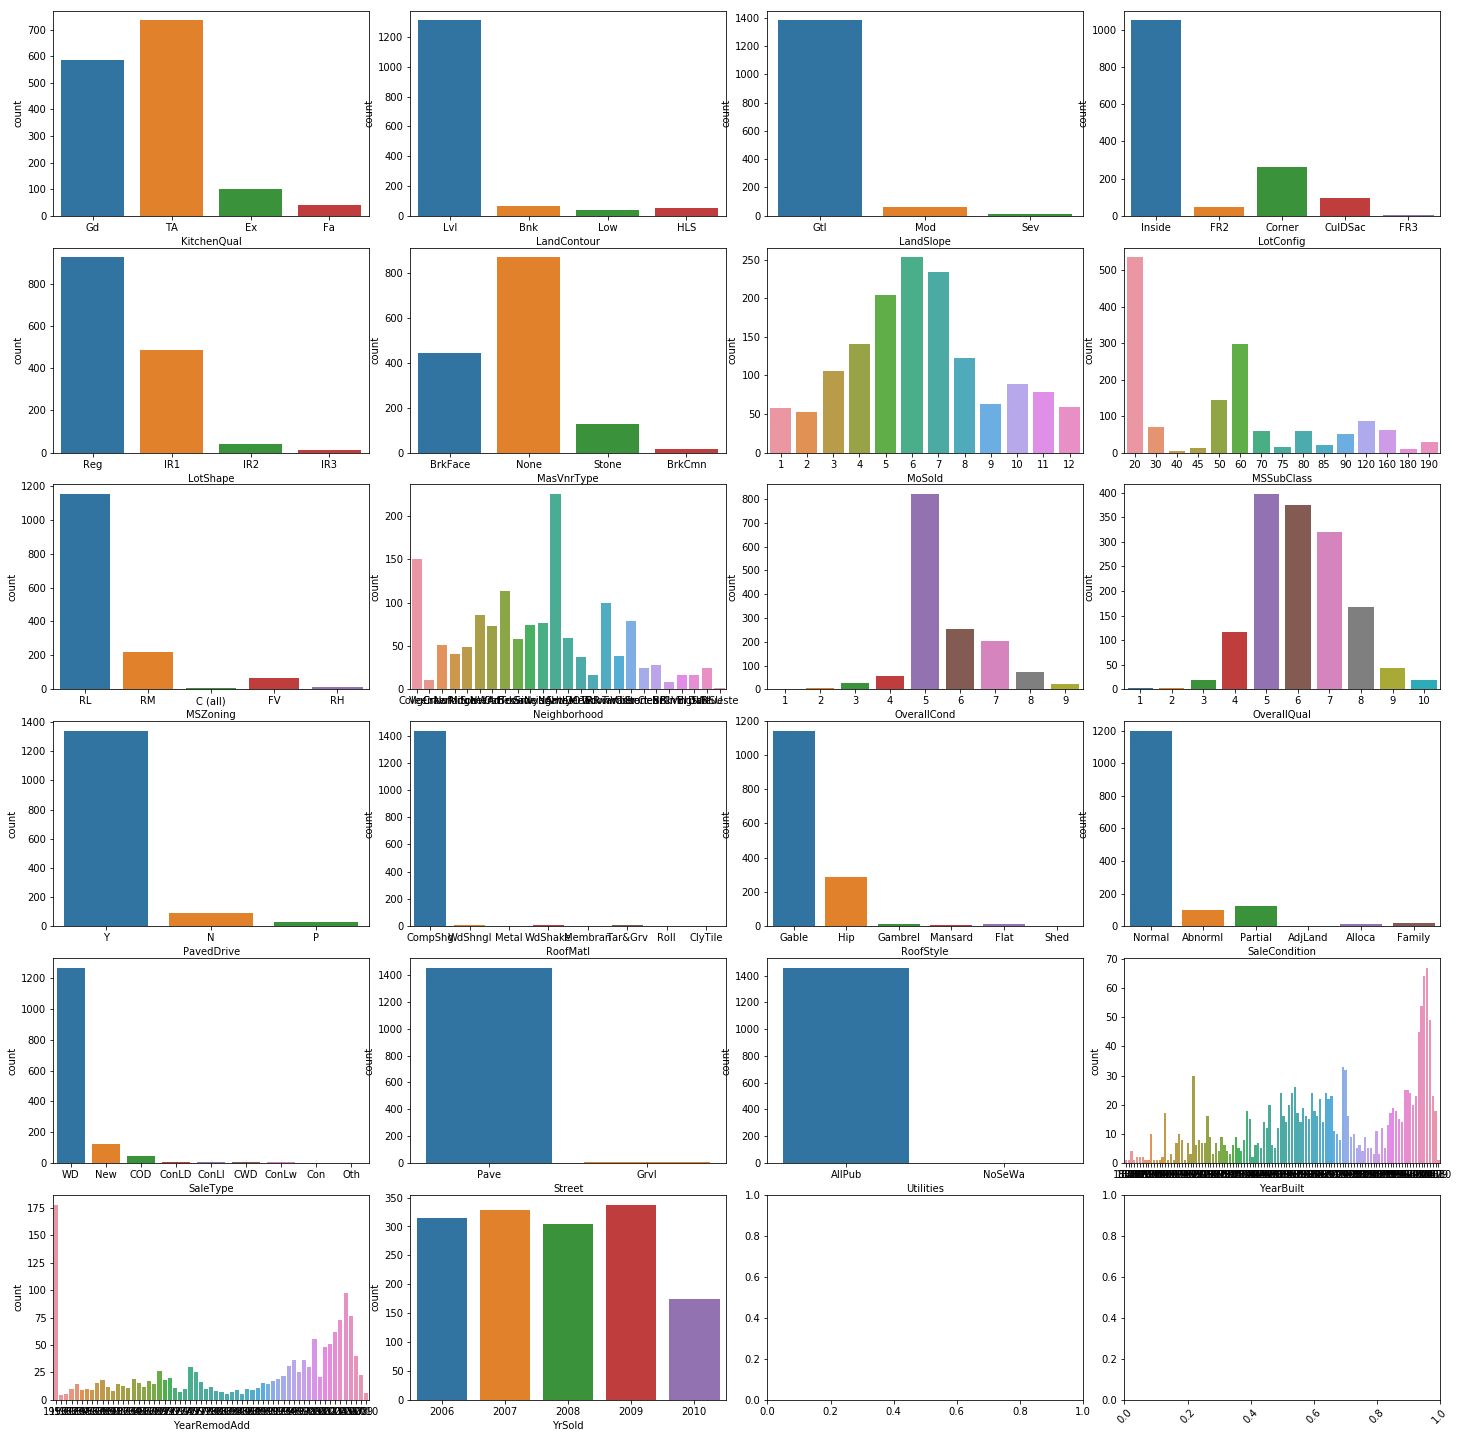

In [33]:
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.xticks(rotation=45) 
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat2):
        sns.countplot(x=data_cat2.columns[i], data=data_cat2, ax=ax)
        

plt.show()      




Again, most of the features have 1-2 most common categories due to the fact that these are typical home characteristics or measures of quality. The year in which the house was built skews towards more recent years, which is consistent with the garage year built. Home sales are generally consistent across years (I assume the 2010 data is incomplete), and most sales occur during the summer.

Since some of the features are ordinal or years, I also look at their descriptive statistics:

In [34]:
data_cat1.describe()

,GarageYrBlt
count,1460.000000
mean,1979.976027
std,24.749688
min,1900.000000
25%,1962.000000
50%,1984.500000
75%,2003.000000
max,2010.000000


In [35]:
data_cat2.describe()

,MoSold,MSSubClass,OverallCond,OverallQual,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.321918,56.897260,5.575342,6.099315,1971.267808,1984.865753,2007.815753
std,2.703626,42.300571,1.112799,1.382997,30.202904,20.645407,1.328095
min,1.000000,20.000000,1.000000,1.000000,1872.000000,1950.000000,2006.000000
25%,5.000000,20.000000,5.000000,5.000000,1954.000000,1967.000000,2007.000000
50%,6.000000,50.000000,5.000000,6.000000,1973.000000,1994.000000,2008.000000
75%,8.000000,70.000000,6.000000,7.000000,2000.000000,2004.000000,2009.000000
max,12.000000,190.000000,9.000000,10.000000,2010.000000,2010.000000,2010.000000


These are consistent with the distrubtions in their respective plots.

## Correlations
To perform feature selection, I next look at correlations with sale price.

In [36]:
numeric.append('FullBathNet')
numeric.append('HalfBathNet')
numeric.append('SalePrice')

correlations = data[numeric]

In [37]:
correlations.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF,TotRmsAbvGrd,WoodDeckSF,FullBathNet,HalfBathNet,SalePrice
0,856.0,854,0,3,706.0,0,1,0,150,0,0,2,548,2,1710,1,1,8450.0,65.0,0,196.0,0,61,0,0,856,8,0,3.0,1,208500
1,1262.0,0,0,3,978.0,0,0,1,284,0,1,2,460,2,1262,0,1,9600.0,80.0,0,0.0,0,0,0,0,1262,6,298,2.0,1,181500
2,920.0,866,0,3,486.0,0,1,0,434,0,1,2,608,2,1786,1,1,11250.0,68.0,0,162.0,0,42,0,0,920,6,0,3.0,1,223500
3,961.0,756,0,3,216.0,0,1,0,540,272,1,1,642,3,1717,0,1,9550.0,60.0,0,0.0,0,35,0,0,756,7,0,2.0,0,140000
4,1145.0,1053,0,4,655.0,0,1,0,490,0,1,2,836,3,2198,1,1,14260.0,84.0,0,350.0,0,84,0,0,1145,9,192,3.0,1,250000


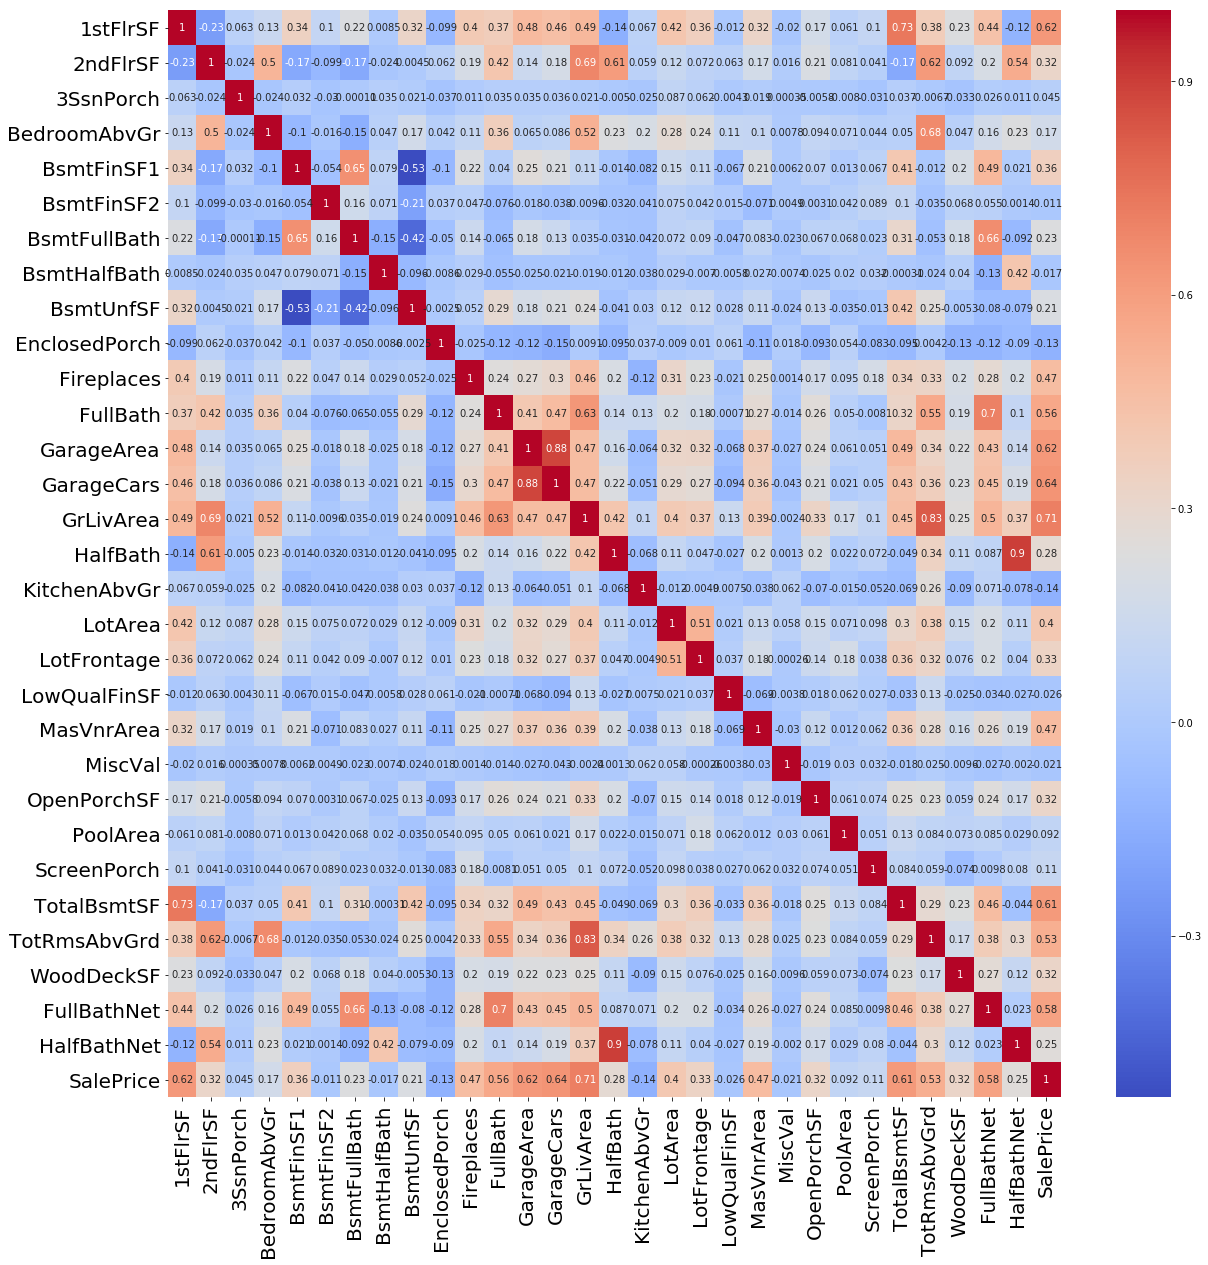

In [38]:
plt.close('all')

plt.figure(figsize=(20,20))
plt.tick_params(labelsize=20)
sns.heatmap(correlations.corr(), annot=True, annot_kws={"size": 10}, cmap=cm.coolwarm)

plt.show()

Several of the features are correlated with sale price. I will use a 0.5 correlation threshold for feature selection.

In [189]:
c = correlations.corr()
cc = c[abs(c['SalePrice']) >= .5]
cc['SalePrice']

1stFlrSF        0.621242
FullBath        0.560664
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
TotalBsmtSF     0.613581
TotRmsAbvGrd    0.533723
FullBathNet     0.584731
SalePrice       1.000000
Name: SalePrice, dtype: float64

Several of the unselected features might be more effective as booleans rather than counts or square footages since so many have 0s.

In [40]:
data['PoolFlag'] = data['PoolArea'].map(lambda a: 1 if a > 0 else 0)
data['FireFlag'] = data['Fireplaces'].map(lambda a: 1 if a > 0 else 0)
data['3SsnPorchFlag'] = data['3SsnPorch'].map(lambda a: 1 if a > 0 else 0)
data['OpenPorchFlag'] = data['OpenPorchSF'].map(lambda a: 1 if a > 0 else 0)
data['ScreenPorchFlag'] = data['ScreenPorch'].map(lambda a: 1 if a > 0 else 0)
data['WoodDeckFlag'] = data['WoodDeckSF'].map(lambda a: 1 if a > 0 else 0)

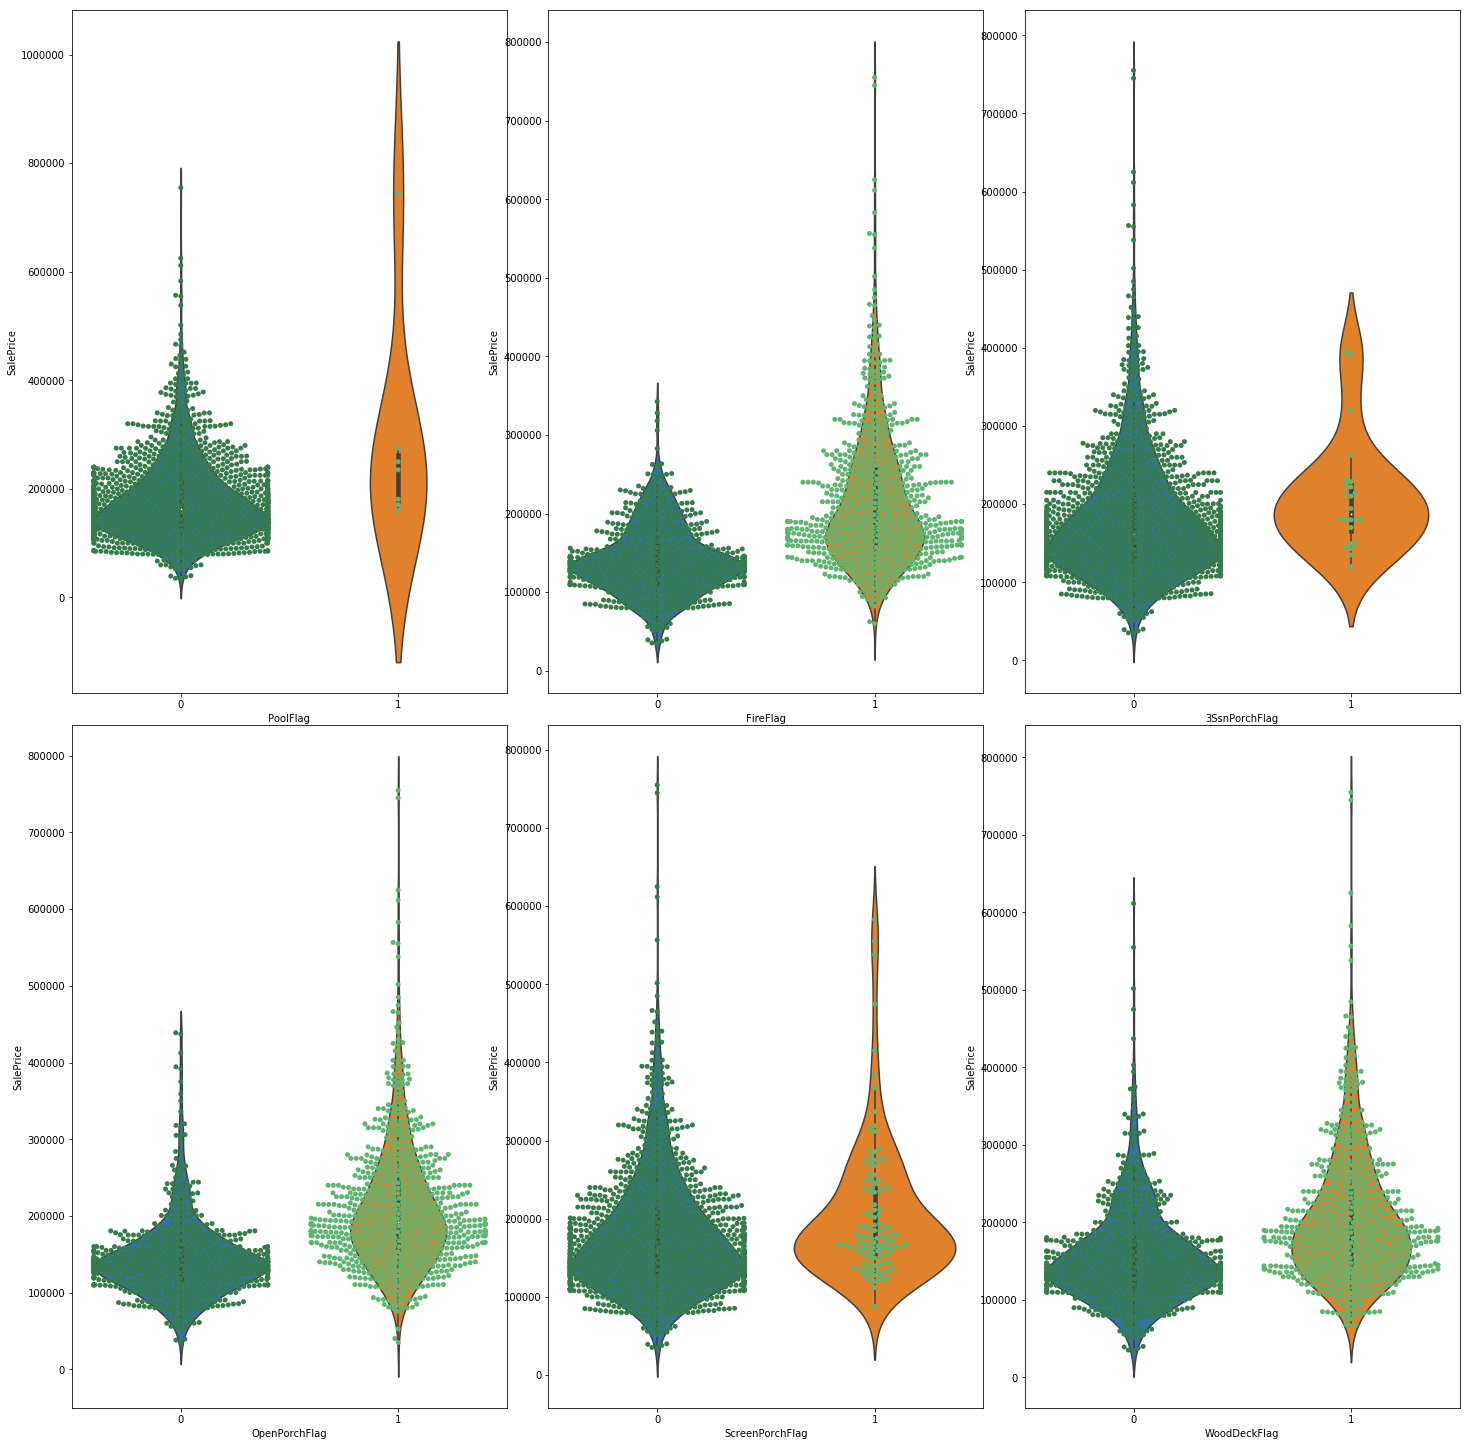

In [41]:
flags=['PoolFlag','FireFlag','3SsnPorchFlag','OpenPorchFlag','ScreenPorchFlag','WoodDeckFlag','SalePrice']
data_fl = data[flags]


plt.close('all')
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat1):
        sns.violinplot(x=data_fl.columns[i], y='SalePrice', data=data_fl, ax=ax)
        sns.swarmplot(x=data_fl.columns[i], y='SalePrice', data=data_fl, palette="Greens_d", ax=ax)

plt.show()      


Some show variance between the boolean values, however the pool flag and three season porch have such low counts the variance may not be meaningful.

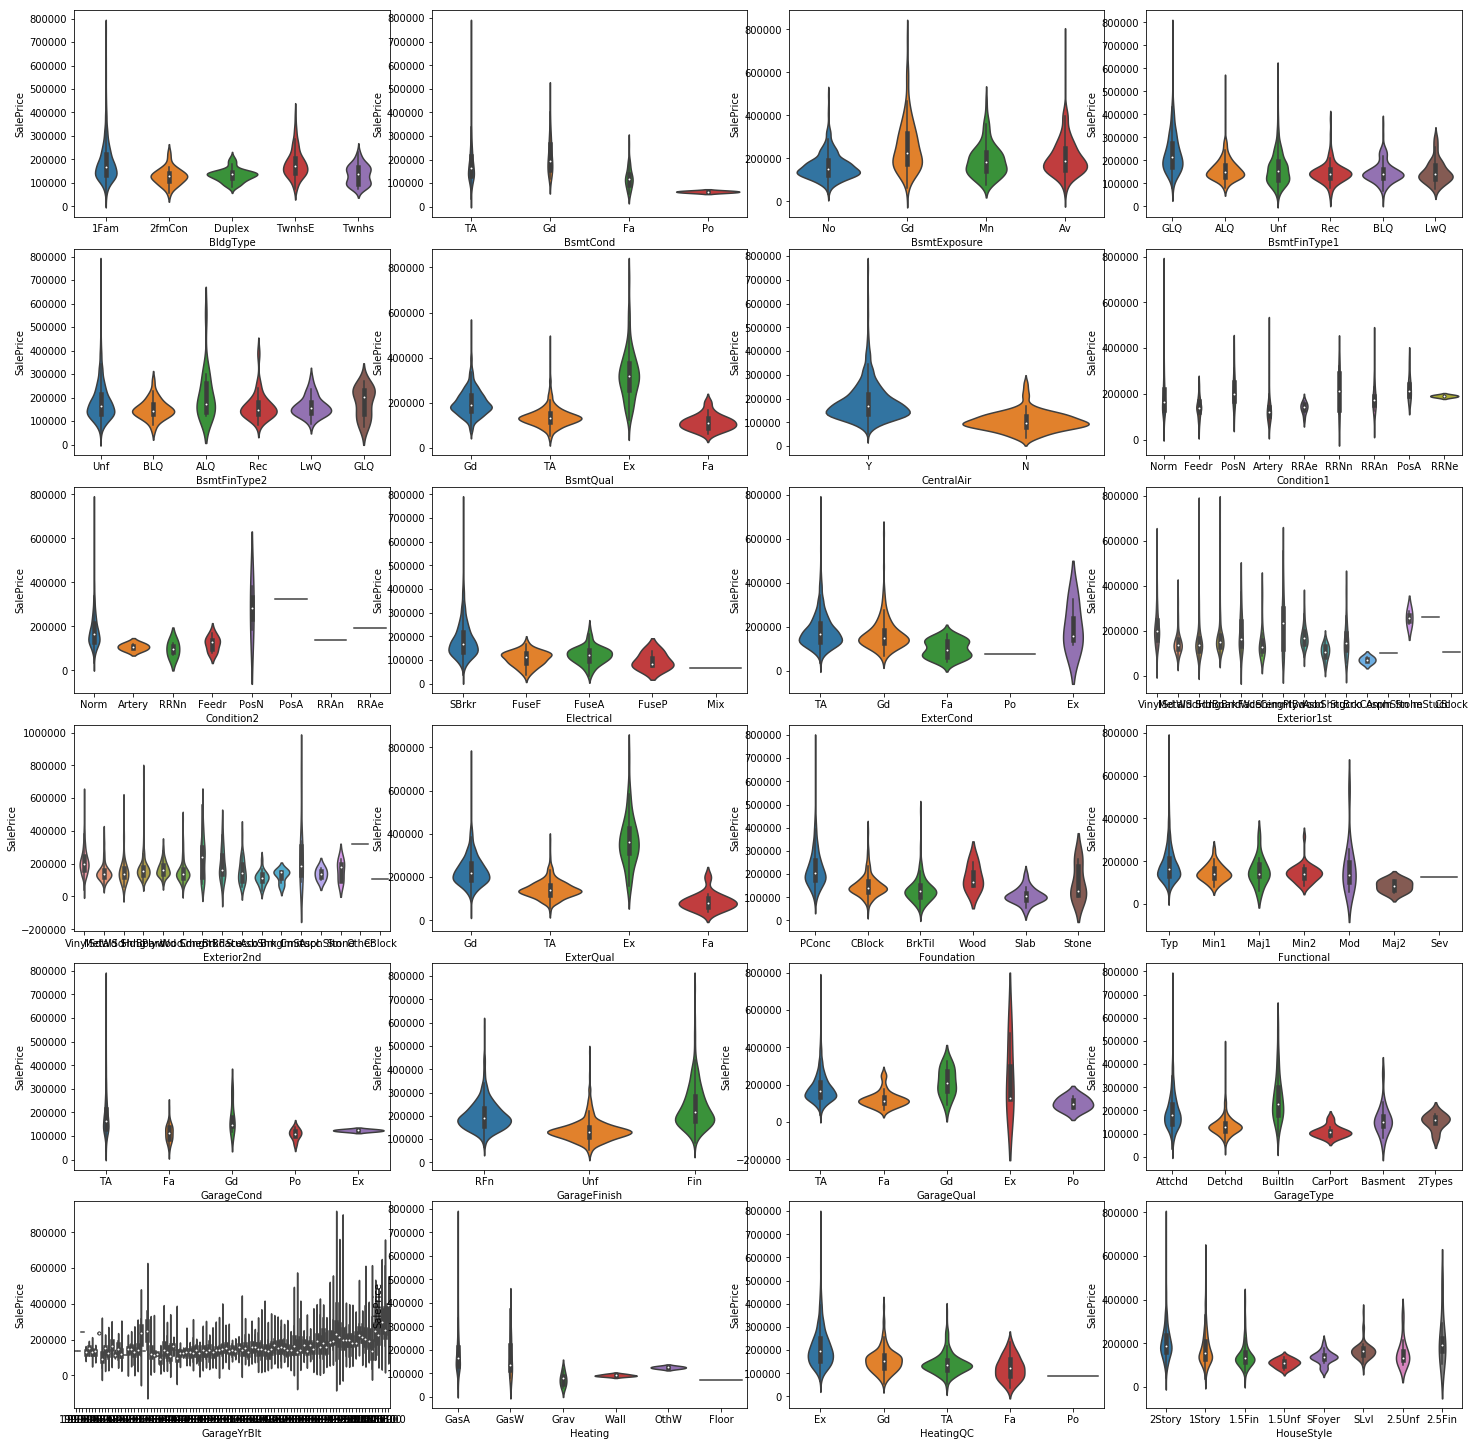

In [42]:
cat1.append('SalePrice')
data_cat1 = data[cat1]
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat1):
        sns.violinplot(x=data_cat1.columns[i], y='SalePrice', data=data_cat1, ax=ax);
        

plt.show()      



Most of the features do not show significant variance between categories. While some may have much broader distributions than others, those are the same categories that have more data in general, similar to the issue noted above with the pool and three season porch flags. Those I am selecting based on these plots are: building type, basement quality, central air, and house style.

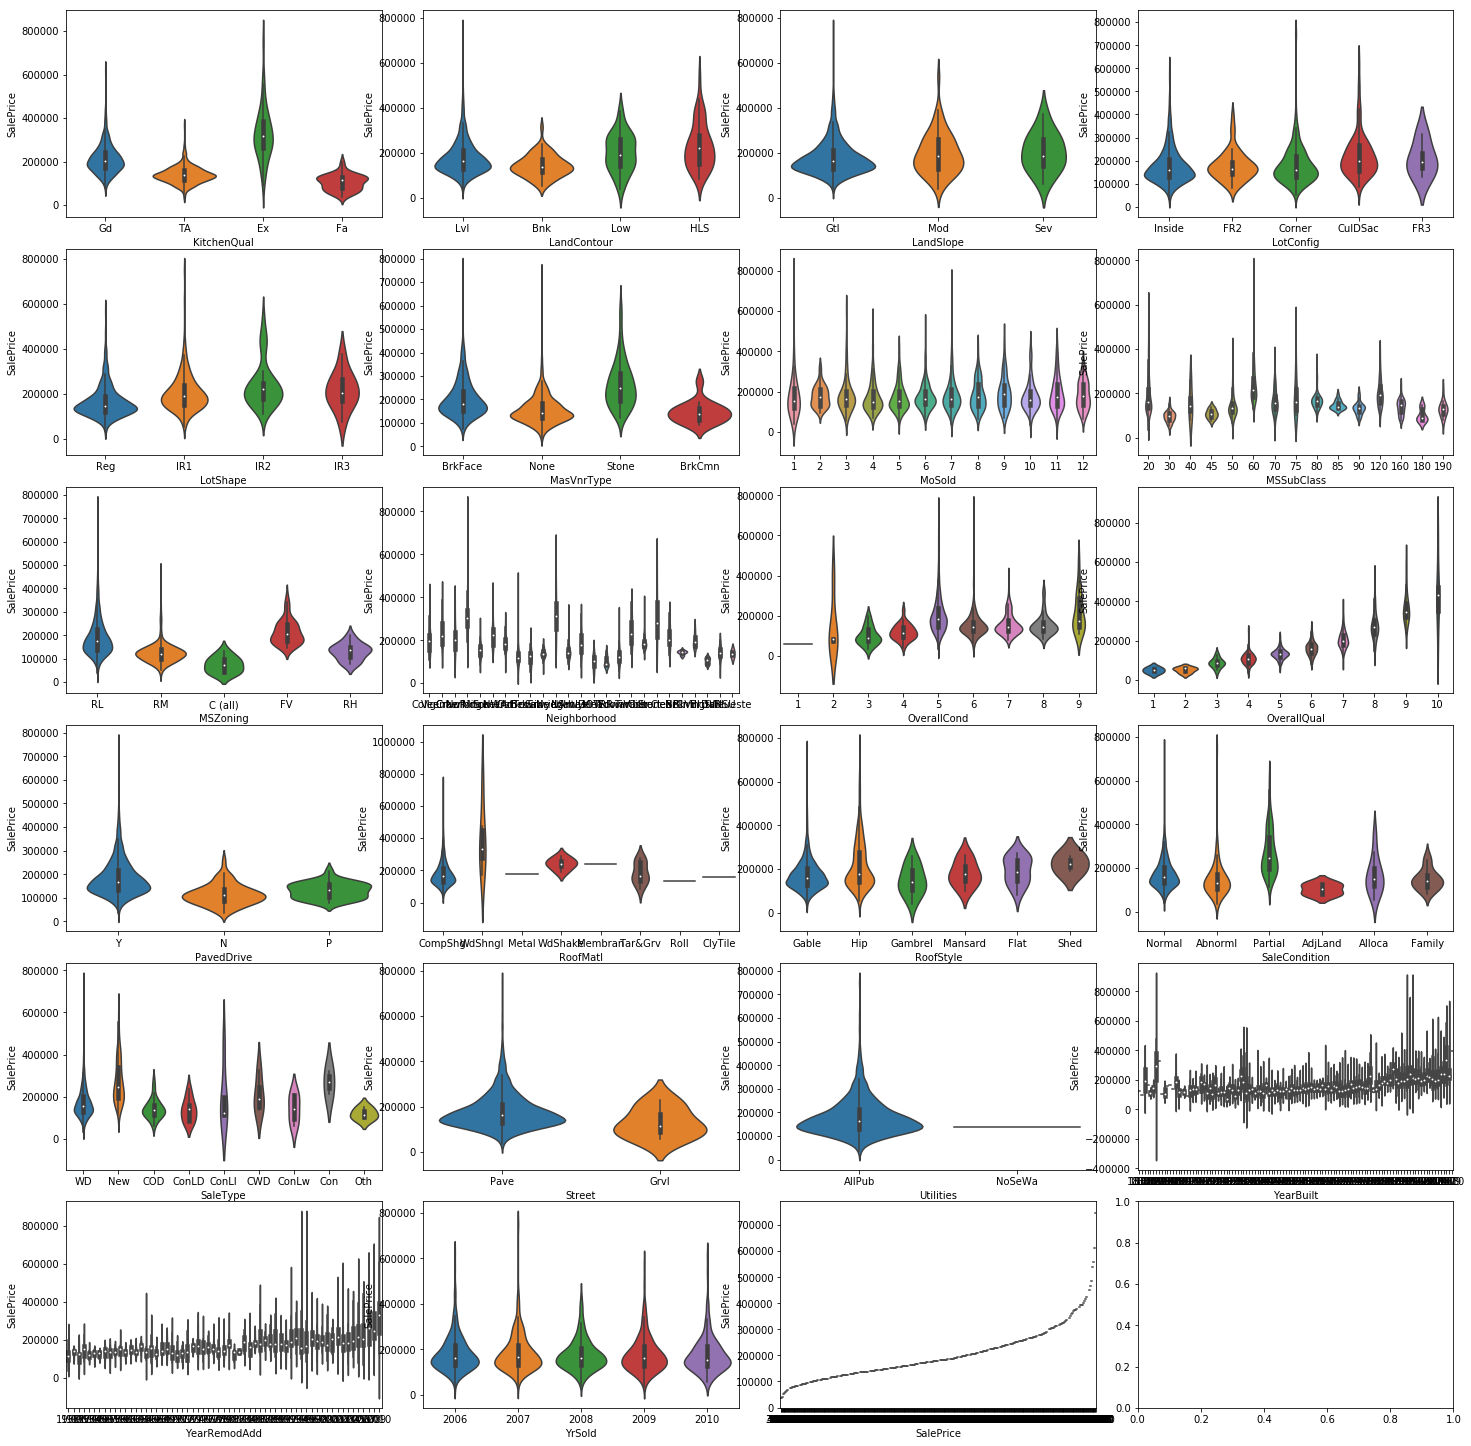

In [43]:
cat2.append('SalePrice')
data_cat2 = data[cat2]
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat2):
        sns.violinplot(x=data_cat2.columns[i], y='SalePrice', data=data_cat2, ax=ax);
        

plt.show()      



Again, most show little variance. Those I am selecting are zoning, neighborhood,  kitchen quality, lot shape, and year built. 

Some of these can be treated as numeric variables, so I will also look at their correlations:

In [44]:
cat_corr=['GarageYrBlt','MoSold','MSSubClass','OverallCond','OverallQual','YearBuilt','YearRemodAdd','YrSold','PoolFlag','FireFlag','3SsnPorchFlag','OpenPorchFlag','ScreenPorchFlag','WoodDeckFlag','SalePrice']

cat_correlations = data[cat_corr]

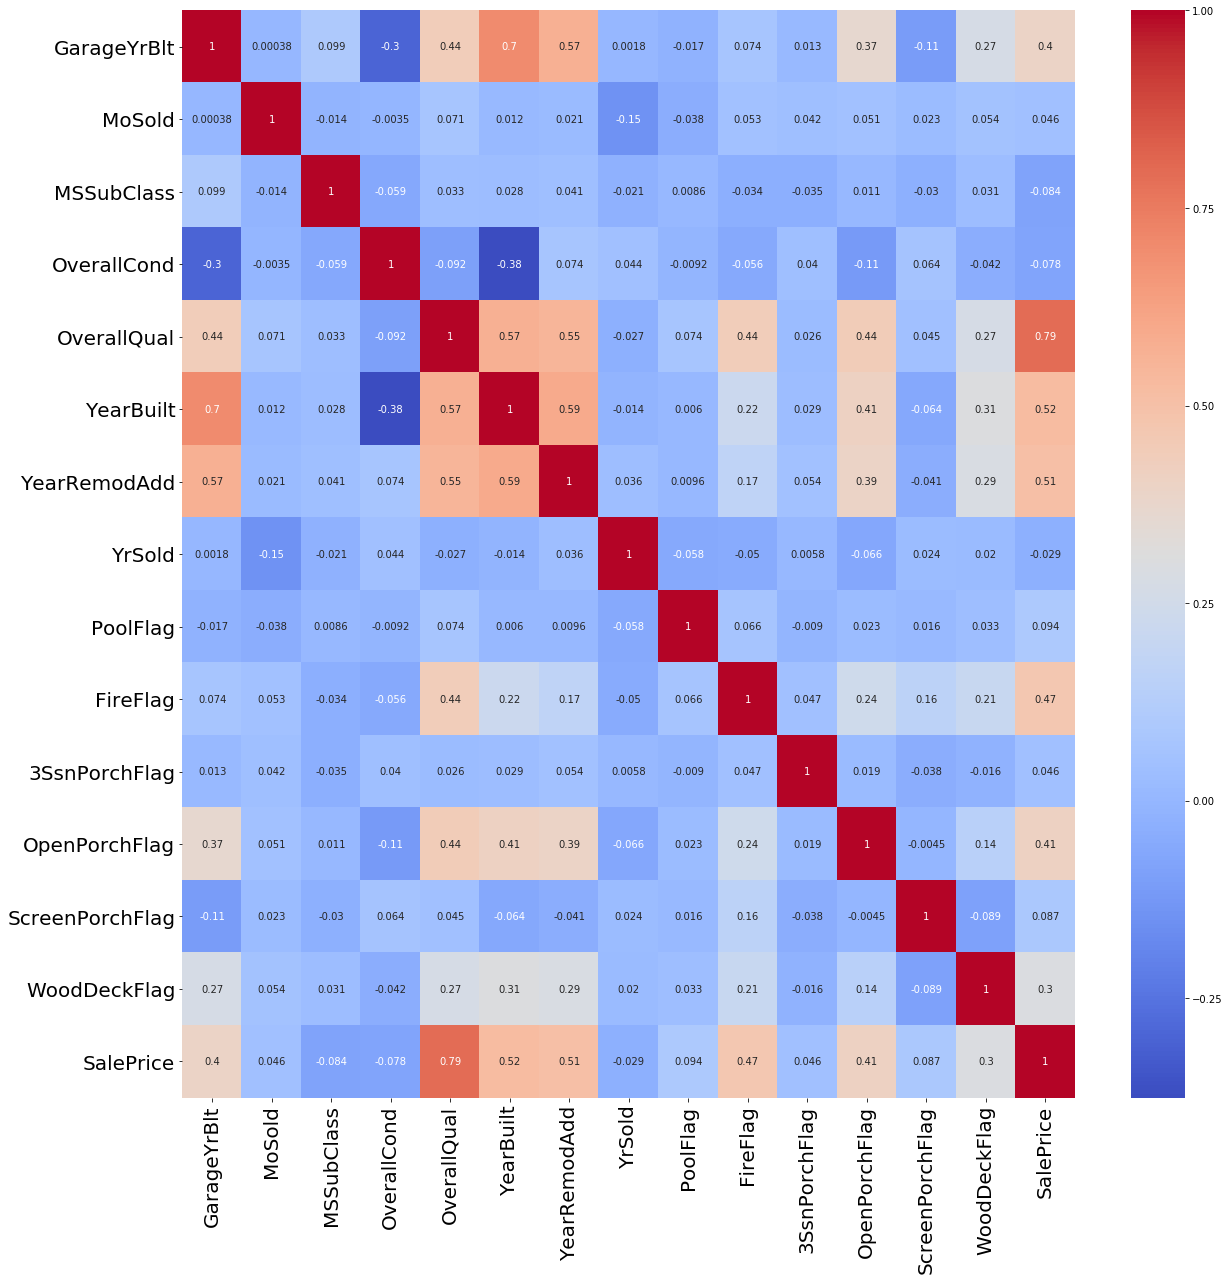

In [45]:
plt.close('all')

plt.figure(figsize=(20,20))
plt.tick_params(labelsize=20)
sns.heatmap(cat_correlations.corr(), annot=True, annot_kws={"size": 10}, cmap=cm.coolwarm)

plt.show()

Similar to the previous correlations, I will again use a 0.5 correlation threshold. There is also the question of the fireplace flag, which has consistently been almost high enough.

For this I will look at a one-way ANOVA:

In [46]:
fire = data.loc[data['FireFlag']==1, 'SalePrice']
nofire = data.loc[data['FireFlag']==0, 'SalePrice']

In [47]:
stats.f_oneway(fire, nofire)

F_onewayResult(statistic=417.71696273136178, pvalue=7.6800893602359463e-82)

In [48]:
print('Fire Stdev: ' + str(np.std(fire)) + ' NoFire Stdev: '  + str(np.std(nofire)))

Fire Stdev: 86787.4907977613 NoFire Stdev: 44357.60870850291


Since the standard deviations are not equivalent, this violates one of the assumptions for ANOVA, however I will keep the feature.

## Exploratory Data Analysis Summary
This data set has a large number of mixed features, making it appropriate for the decision tree analysis I have chosen to do. Many of the variables are highly skewed due to the tendency for homes in similar areas to be similar in size and have similar construction features such as type of heating and electrical systems. Many are also newly built, which would explain similarities between homes.

Based on these analyses, I am keeping for model creation: 1stFlrSF, GarageArea, GarageCars, GrLivArea, TotalBsmtSF, TotRmsAbvGrd, FullBathNet, OverallQual, YrBuilt, YrRemodAdd, BldgType, BsmtQual, CentralAir, FireFlag, ExteriorCond, HouseStyle, KitchenQual, LotShape, MSZoning, Neighborhood

# Part B

Before getting into the analysis, the categorical variables need to be converted to dummy variables.

## Dummy Variables

In [51]:
selected=['1stFlrSF','GarageArea','GarageCars','GrLivArea','TotalBsmtSF',
          'TotRmsAbvGrd','FullBathNet','OverallQual','YearBuilt','YearRemodAdd','BldgType',
          'BsmtQual','CentralAir','FireFlag','ExterCond','HouseStyle','KitchenQual',
          'LotShape','MSZoning','Neighborhood','SalePrice']

data = data[selected]

In [52]:
data.head()

,1stFlrSF,GarageArea,GarageCars,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,FullBathNet,OverallQual,YearBuilt,YearRemodAdd,BldgType,BsmtQual,CentralAir,FireFlag,ExterCond,HouseStyle,KitchenQual,LotShape,MSZoning,Neighborhood,SalePrice
0,856.0,548,2,1710,856,8,3.0,7,2003,2003,1Fam,Gd,Y,0,TA,2Story,Gd,Reg,RL,CollgCr,208500
1,1262.0,460,2,1262,1262,6,2.0,6,1976,1976,1Fam,Gd,Y,1,TA,1Story,TA,Reg,RL,Veenker,181500
2,920.0,608,2,1786,920,6,3.0,7,2001,2002,1Fam,Gd,Y,1,TA,2Story,Gd,IR1,RL,CollgCr,223500
3,961.0,642,3,1717,756,7,2.0,7,1915,1970,1Fam,TA,Y,1,TA,2Story,Gd,IR1,RL,Crawfor,140000
4,1145.0,836,3,2198,1145,9,3.0,8,2000,2000,1Fam,Gd,Y,1,TA,2Story,Gd,IR1,RL,NoRidge,250000


In [53]:
bldg = pd.get_dummies(data['BldgType'], prefix='BT')
data = data.join(bldg)
data.drop('BldgType', axis=1, inplace=True)

bsmt = pd.get_dummies(data['BsmtQual'], prefix='BSMT')
data = data.join(bsmt)
data.drop('BsmtQual', axis=1, inplace=True)

ec = pd.get_dummies(data['ExterCond'], prefix='EC')
data = data.join(ec)
data.drop('ExterCond', axis=1, inplace=True)

house = pd.get_dummies(data['HouseStyle'], prefix='HS')
data = data.join(house)
data.drop('HouseStyle', axis=1, inplace=True)

kit = pd.get_dummies(data['KitchenQual'], prefix='K')
data = data.join(kit)
data.drop('KitchenQual', axis=1, inplace=True)

lot = pd.get_dummies(data['LotShape'], prefix='L')
data = data.join(lot)
data.drop('LotShape', axis=1, inplace=True)

zoning = pd.get_dummies(data['MSZoning'], prefix='Z')
data = data.join(zoning)
data.drop('MSZoning', axis=1, inplace=True)

neighborhood = pd.get_dummies(data['Neighborhood'], prefix='N')
data = data.join(neighborhood)
data.drop('Neighborhood', axis=1, inplace=True)

data['AC'] = data['CentralAir'].map(lambda x: 1 if x == 'Y' else 0)
data.drop('CentralAir', axis=1, inplace=True)

In [54]:
data.head()

,1stFlrSF,GarageArea,GarageCars,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,FullBathNet,OverallQual,YearBuilt,YearRemodAdd,FireFlag,SalePrice,BT_1Fam,BT_2fmCon,BT_Duplex,BT_Twnhs,BT_TwnhsE,BSMT_Ex,BSMT_Fa,BSMT_Gd,BSMT_TA,EC_Ex,EC_Fa,EC_Gd,EC_Po,EC_TA,HS_1.5Fin,HS_1.5Unf,HS_1Story,HS_2.5Fin,HS_2.5Unf,HS_2Story,HS_SFoyer,HS_SLvl,K_Ex,K_Fa,K_Gd,K_TA,L_IR1,L_IR2,L_IR3,L_Reg,Z_C (all),Z_FV,Z_RH,Z_RL,Z_RM,N_Blmngtn,N_Blueste,N_BrDale,N_BrkSide,N_ClearCr,N_CollgCr,N_Crawfor,N_Edwards,N_Gilbert,N_IDOTRR,N_MeadowV,N_Mitchel,N_NAmes,N_NPkVill,N_NWAmes,N_NoRidge,N_NridgHt,N_OldTown,N_SWISU,N_Sawyer,N_SawyerW,N_Somerst,N_StoneBr,N_Timber,N_Veenker,AC
0,856.0,548,2,1710,856,8,3.0,7,2003,2003,0,208500,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1262.0,460,2,1262,1262,6,2.0,6,1976,1976,1,181500,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,920.0,608,2,1786,920,6,3.0,7,2001,2002,1,223500,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,961.0,642,3,1717,756,7,2.0,7,1915,1970,1,140000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1145.0,836,3,2198,1145,9,3.0,8,2000,2000,1,250000,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [55]:
data.shape

(1460, 73)

## Random Forest
First we convert the data into an array

In [85]:
array=data.values
Y=array[:,11]
Y

array([ 208500.,  181500.,  223500., ...,  266500.,  142125.,  147500.])

In [86]:
x1=array[:,:11]
x2=array[:,12:]

X=np.hstack((x1,x2))

X[1]

array([  1.26200000e+03,   4.60000000e+02,   2.00000000e+00,
         1.26200000e+03,   1.26200000e+03,   6.00000000e+00,
         2.00000000e+00,   6.00000000e+00,   1.97600000e+03,
         1.97600000e+03,   1.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [88]:
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [89]:
forest.feature_importances_

array([  6.34183419e-02,   3.21680660e-02,   1.43088172e-02,
         1.54428057e-01,   6.49577923e-02,   1.22844821e-02,
         1.34325325e-02,   5.11576596e-01,   2.28871233e-02,
         1.26874796e-02,   3.10277238e-03,   1.44669536e-03,
         5.22410974e-05,   8.52377302e-04,   1.65370996e-04,
         3.68972166e-04,   2.54479523e-02,   3.85391749e-04,
         2.73237792e-03,   4.33053955e-04,   0.00000000e+00,
         9.11613467e-04,   3.67973063e-04,   0.00000000e+00,
         2.79711306e-03,   5.85042123e-04,   3.39505067e-05,
         6.00249568e-04,   3.62201087e-05,   3.95532366e-05,
         8.14910525e-04,   7.22424575e-06,   2.84697262e-04,
         1.86517182e-02,   1.26681497e-04,   1.15788827e-02,
         3.46865885e-04,   4.22505925e-04,   1.26986421e-04,
         4.65773406e-04,   3.69823885e-03,   3.11609948e-04,
         3.05979648e-05,   2.72804567e-05,   4.29051366e-04,
         3.39559678e-03,   3.79407312e-05,   0.00000000e+00,
         2.50350196e-04,

In [90]:
ptrain = forest.predict(X_train)
ptest = forest.predict(X_test)

score_train = forest.score(X_train, Y_train)
score_test = forest.score(X_test, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.968410033693	|0.833376638993	|
|rms 		|14150.190912347156|32186.580952008455|
|mae		|8101.05855465	|19819.3907915	|
|mape 		|4.62235702617	|11.9655074336 	|


In comparing the metrics for train versus test, the model is overfitting the training data. We can take a few approaches to reduce the overfitting, as well as improve overall accuracy.

We can increase the number of trees generated (default is 10), and we can decrease the depth of the trees (per the [class notes](https://github.com/nikbearbrown/NEU_COE/blob/master/CSYE_7245/Week_2/NBB_Decision_Trees.ipynb), a best practice for this is the squareroot of the number of features).

In [91]:
forest = RandomForestRegressor(n_estimators=100, max_depth=8)
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
ptrain = forest.predict(X_train)
ptest = forest.predict(X_test)

score_train = forest.score(X_train, Y_train)
score_test = forest.score(X_test, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.960242041381	|0.854909606591	|
|rms 		|15874.489088513992|30034.90272442047|
|mae		|11012.3565267	|18606.5636905	|
|mape 		|6.67985378718	|11.6220964036 	|


In [93]:
forest = RandomForestRegressor(n_estimators=200, max_depth=8)
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
ptrain = forest.predict(X_train)
ptest = forest.predict(X_test)

score_train = forest.score(X_train, Y_train)
score_test = forest.score(X_test, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.961670900132	|0.85700842454	|
|rms 		|15586.622894322729|29816.87510365272|
|mae		|10862.3503594	|18706.9455904	|
|mape 		|6.61038707141	|11.5952943399 	|


We can visualize the bias in the predictions by plotting the actual vs predicted values:

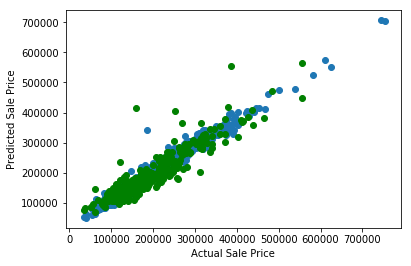

In [109]:
plt.close('all')
plt.scatter(x=Y_train, y=ptrain)
plt.scatter(x=Y_test, y=ptest, color='green')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

The model appears to be doing well for most values, but a few are off by a large margin such as the outlier near actual=200k and predicted=400k.

Since parameter tuning is only causing marginal improvements and the models are overfitting, a next step is to look at cross validation. For this, we use KFold, and since the size of the data set is relatively small, we will only use 3 folds (the default).

I have adapted this code from the tutorial [Improve Your Model Performance using Cross Validation (in Python and R)](https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/)

In [67]:
kf = KFold()
forest = RandomForestRegressor(n_estimators=200, max_depth=8)
kfdata_raw = data.drop('SalePrice', axis=1)
kfdata_raw['SalePrice'] = data['SalePrice']

kfdata_raw.shape

(1460, 73)

In [68]:
kfdata = kfdata_raw.values
X = kfdata[:,:72]
Y = kfdata[:,72]

In [69]:
trainscores = []
testscores = []
for kftrain, kftest in kf.split(kfdata):
    forest.fit(X[kftrain], Y[kftrain])
    s1 = forest.score(X[kftrain],Y[kftrain])
    trainscores.append(s1)
    s2 = forest.score(X[kftest],Y[kftest])
    testscores.append(s2)

In [70]:
sum(trainscores)/3

0.96251456121522938

In [71]:
sum(testscores)/3

0.85942701094193408

Thus even with cross validation, the model is still over fitting. So we can try a different ensemble method - Gradient Boosted Decision Trees.

## Gradient Boosted Decision Trees (XGBoost)
XGBoost differs from Random Forest in that rather than averaging a large number of independently generated trees, XGBoost starts with one and modifies it iteratively.

This code is adapted from the Kaggle tutorial on [Learning to Use XGBoost](https://www.kaggle.com/dansbecker/learning-to-use-xgboost)

In [110]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [111]:
ptrain = xgb.predict(X_train)
ptest = xgb.predict(X_test)

score_train = xgb.score(X_train, Y_train)
score_test = xgb.score(X_test, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.952579167853	|0.907685797027	|
|rms 		|17336.934299514374|23957.481572651828|
|mae		|12351.2994358	|16693.0177743	|
|mape 		|7.64724879382	|10.1067729814 	|


With just the default parameters, this is already performing better than Random Forest. A useful parameter to modify is the number of estimators, which we can give a high value and then use the early_stopping_rounds parameter in the fit method to stop the model when its accuracy is no longer improving.

In [112]:
xgb = XGBRegressor(n_estimators=1000)
xgb.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)])

[0]	validation_0-rmse:181271
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:164245
[2]	validation_0-rmse:149132
[3]	validation_0-rmse:135712
[4]	validation_0-rmse:123340
[5]	validation_0-rmse:112114
[6]	validation_0-rmse:102192
[7]	validation_0-rmse:93003.8
[8]	validation_0-rmse:85196
[9]	validation_0-rmse:77876.5
[10]	validation_0-rmse:71366.7
[11]	validation_0-rmse:65406.8
[12]	validation_0-rmse:60441.2
[13]	validation_0-rmse:56084.8
[14]	validation_0-rmse:52071.9
[15]	validation_0-rmse:48609.7
[16]	validation_0-rmse:45486.8
[17]	validation_0-rmse:42758.9
[18]	validation_0-rmse:40416.8
[19]	validation_0-rmse:38420.4
[20]	validation_0-rmse:36459.5
[21]	validation_0-rmse:34992.8
[22]	validation_0-rmse:33549.7
[23]	validation_0-rmse:32366.5
[24]	validation_0-rmse:31292.1
[25]	validation_0-rmse:30482.3
[26]	validation_0-rmse:29670.4
[27]	validation_0-rmse:28960.1
[28]	validation_0-rmse:28503.8
[29]	validation_0-rmse:28032.8
[30]	validation_0-rmse:27

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [113]:
ptrain = xgb.predict(X_train)
ptest = xgb.predict(X_test)

score_train = xgb.score(X_train, Y_train)
score_test = xgb.score(X_test, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.955940475448	|0.908600825116	|
|rms 		|16711.199395090927|23838.451339609568|
|mae		|11942.6153796	|16578.0223138	|
|mape 		|7.41794643338	|10.0116817918 	|


We can decrease the learning rate, which slows down the model but will reduce the weight given each new tree which helps reduce overfitting. 

In [118]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], 
        verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [119]:
ptrain = xgb.predict(X_train)
ptest = xgb.predict(X_test)

score_train = xgb.score(X_train, Y_train)
score_test = xgb.score(X_test, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.951372246736	|0.913829692755	|
|rms 		|17556.171724123564|23146.520837875043|
|mae		|12591.4041707	|16360.0441549	|
|mape 		|7.78761752803	|9.90550248607 	|


In [116]:
xgb2 = XGBRegressor(n_estimators=1000, learning_rate=0.025)
xgb2.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], 
        verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.025, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [117]:
ptrain = xgb2.predict(X_train)
ptest = xgb2.predict(X_test)

score_train = xgb2.score(X_train, Y_train)
score_test = xgb2.score(X_test, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.951938845532	|0.912071811703	|
|rms 		|17453.591910879484|23381.424297682515|
|mae		|12457.0316781	|16515.1400899	|
|mape 		|7.71173274767	|9.96844356783 	|


Interestingly, slowing down the learning rate even further slightly increased the overfitting.

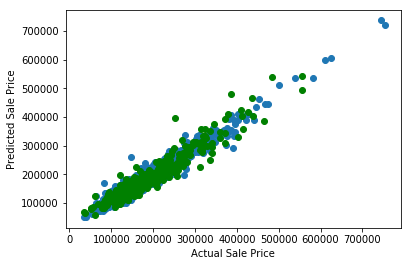

In [180]:
plt.close('all')
plt.scatter(x=Y_train, y=ptrain)
plt.scatter(x=Y_test, y=ptest, color='green')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

XGBoost has given much better results than Random Forest, but let's try one more non-linear algorithm for comparison.

## Neural Network (MLP)

Neural networks are sensitive to the relative values of features, so first we must scale the data. The scaler is fitted to the training data, and then both train and test data must be transformed.

In [72]:
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scale = scaler.transform(X_train) 
X_test_scale = scaler.transform(X_test)  

In [181]:
mlp = MLPRegressor(hidden_layer_sizes=(50,20,10))
mlp.fit(X_train_scale,Y_train)

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [182]:
ptrain = mlp.predict(X_train_scale)
ptest = mlp.predict(X_test_scale)

score_train = mlp.score(X_train_scale, Y_train)
score_test = mlp.score(X_test_scale, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|-0.294743206299	|-0.526647146144	|
|rms 		|90589.84955988883|97426.30587611801|
|mae		|65529.8107492	|70563.4850775	|
|mape 		|38.8061500802	|40.2129607302 	|


While this does not have the extent of overfitting as the Random Forest, the accuracy is much lower. Increasing the number of iterations may help since the model did not converge.

In [75]:
mlp = MLPRegressor(hidden_layer_sizes=(100,40,20), max_iter=500)
mlp.fit(X_train_scale,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 40, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [76]:
ptrain = mlp.predict(X_train_scale)
ptest = mlp.predict(X_test_scale)

score_train = mlp.score(X_train_scale, Y_train)
score_test = mlp.score(X_test_scale, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.863141594774	|-3.96088262659	|
|rms 		|103734.07264399095|199616.50035777362|
|mae		|63319.1922725	|178570.258877	|
|mape 		|37.1283289776	|103.056436166 	|


Increasing the number of layers made the accuracy worse, and the model is now overfitting. We can try to improve the model through parameter tuning, particularly focusing on the alpha value. Alpha is used to regularize the data. The grid search method below is based on Skikit Learn's [Tips on Practical Use](http://scikit-learn.org/stable/modules/neural_networks_supervised.html) section of the documentation for neural networks.

In [183]:
mlp = MLPRegressor(hidden_layer_sizes=(50,20,10), max_iter=500)
alphas = 10.0 ** -np.arange(1, 7)
grid = GridSearchCV(estimator=mlp, param_grid=dict(alpha=alphas))
grid.fit(X_train_scale, Y_train)
print(grid)

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimi

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-01,   1.00000e-02,   1.00000e-03,   1.00000e-04,
         1.00000e-05,   1.00000e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [184]:
grid.best_score_

-0.24688984641160813

In [185]:
grid.best_estimator_.alpha

0.10000000000000001

In [186]:
mlp = MLPRegressor(hidden_layer_sizes=(50,20,10), max_iter=500, alpha=.1)
mlp.fit(X_train_scale,Y_train)

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [187]:
ptrain = mlp.predict(X_train_scale)
ptest = mlp.predict(X_test_scale)

score_train = mlp.score(X_train_scale, Y_train)
score_test = mlp.score(X_test_scale, Y_test)
rms_train = sqrt(mean_squared_error(Y_train, ptrain))
rms_test = sqrt(mean_squared_error(Y_test, ptest))
mae_train = mean_absolute_error(Y_train, ptrain)
mae_test = mean_absolute_error(Y_test, ptest)
mape_train = np.mean(np.abs((Y_train - ptrain) / Y_train)) * 100
mape_test = np.mean(np.abs((Y_test - ptest) / Y_test)) * 100

print('|metric \t|train\t\t|test\t\t| \n|score \t\t|'+str(score_train)+'\t|'
      +str(score_test)+'\t|\n|rms \t\t|'
      +str(rms_train)+'|'+str(rms_test)+'|\n|mae\t\t|'
      +str(mae_train)+'\t|'+str(mae_test)+'\t|\n|mape \t\t|'+str(mape_train)
      +'\t|'+str(mape_test)+' \t|')

|metric 	|train		|test		| 
|score 		|0.0122764135755	|-0.233886630692	|
|rms 		|79123.48914999365|87587.98390279531|
|mae		|56607.2832384	|64579.0979677	|
|mape 		|35.2500691209	|39.1904103336 	|


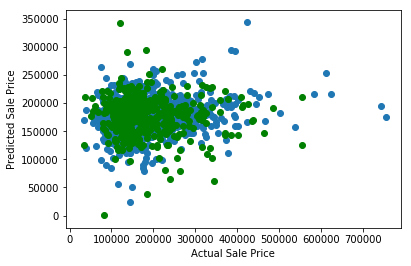

In [188]:
plt.close('all')
plt.scatter(x=Y_train, y=ptrain)
plt.scatter(x=Y_test, y=ptest, color='green')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

Regularization has improved the overfitting, but again the model failed to converge and the accuracy is much lower than Random Forest and XGBoost.

## Kaggle Test Set
Overall, the second-to last XGBoost model gave the best results. This is thus what I will be using for my Kaggle submission.

In [164]:
test_data = pd.read_csv('test.csv', header=0)

In [165]:
test_data.shape

(1459, 80)

The test data appears to be half of the total Ames Housing data set.

In [166]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Since many of the columns will be eliminated, only an appreviated data cleansing is necessary.

In [167]:
missing_percents = (len(test_data.index) - test_data.count())/len(test_data.index)
missing_percents = missing_percents[missing_percents > 0]

In [168]:
missing_percents

MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64

In [169]:
def fullbathrooms(x):
    return x['BsmtFullBath'] + x['FullBath']

test_data['FullBathNet'] = test_data.apply(lambda x: fullbathrooms(x), axis=1)

modes = ['BsmtQual','KitchenQual','MSZoning']
for m in modes:
    values = test_data[m].mode()
    test_data[m].fillna(values[0], inplace=True)

medians = ['TotalBsmtSF','GarageCars','GarageArea','FullBathNet']
for m in medians:
    test_data[m].fillna(test_data[m].median(), inplace=True)

test_data.loc[test_data['1stFlrSF'] > 2500, '1stFlrSF'] = test_data['1stFlrSF'].median()
test_data.loc[test_data['FullBathNet'] == 0, 'FullBathNet'] = test_data['FullBathNet'].median()

test_data['FireFlag'] = test_data['Fireplaces'].map(lambda a: 1 if a > 0 else 0)


selected=['1stFlrSF','GarageArea','GarageCars','GrLivArea','TotalBsmtSF',
          'TotRmsAbvGrd','FullBathNet','OverallQual','YearBuilt','YearRemodAdd','BldgType',
          'BsmtQual','CentralAir','FireFlag','ExterCond','HouseStyle','KitchenQual',
          'LotShape','MSZoning','Neighborhood']

test_data=test_data[selected]

Check that no missing values were missing:

In [170]:
test_data.isnull().any()

1stFlrSF        False
GarageArea      False
GarageCars      False
GrLivArea       False
TotalBsmtSF     False
TotRmsAbvGrd    False
FullBathNet     False
OverallQual     False
YearBuilt       False
YearRemodAdd    False
BldgType        False
BsmtQual        False
CentralAir      False
FireFlag        False
ExterCond       False
HouseStyle      False
KitchenQual     False
LotShape        False
MSZoning        False
Neighborhood    False
dtype: bool

Create dummy variables:

In [171]:
bldg = pd.get_dummies(test_data['BldgType'], prefix='BT')
test_data = test_data.join(bldg)
test_data.drop('BldgType', axis=1, inplace=True)

bsmt = pd.get_dummies(test_data['BsmtQual'], prefix='BSMT')
test_data = test_data.join(bsmt)
test_data.drop('BsmtQual', axis=1, inplace=True)

ec = pd.get_dummies(test_data['ExterCond'], prefix='EC')
test_data = test_data.join(ec)
test_data.drop('ExterCond', axis=1, inplace=True)

house = pd.get_dummies(test_data['HouseStyle'], prefix='HS')
# Correct for missing column
house2 = house[['HS_1.5Fin','HS_1.5Unf','HS_1Story']]
house2['HS_2.5Fin']=0
house3=house[['HS_2.5Unf','HS_2Story','HS_SFoyer','HS_SLvl']]
house2 = house2.join(house3)
test_data = test_data.join(house2)
test_data.drop('HouseStyle', axis=1, inplace=True)

kit = pd.get_dummies(test_data['KitchenQual'], prefix='K')
test_data = test_data.join(kit)
test_data.drop('KitchenQual', axis=1, inplace=True)

lot = pd.get_dummies(test_data['LotShape'], prefix='L')
test_data = test_data.join(lot)
test_data.drop('LotShape', axis=1, inplace=True)

zoning = pd.get_dummies(test_data['MSZoning'], prefix='Z')
test_data = test_data.join(zoning)
test_data.drop('MSZoning', axis=1, inplace=True)

neighborhood = pd.get_dummies(test_data['Neighborhood'], prefix='N')
test_data = test_data.join(neighborhood)
test_data.drop('Neighborhood', axis=1, inplace=True)

test_data['AC'] = test_data['CentralAir'].map(lambda x: 1 if x == 'Y' else 0)
test_data.drop('CentralAir', axis=1, inplace=True)

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Check that nothing was missed:

In [172]:
test_data.head()

,1stFlrSF,GarageArea,GarageCars,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,FullBathNet,OverallQual,YearBuilt,YearRemodAdd,FireFlag,BT_1Fam,BT_2fmCon,BT_Duplex,BT_Twnhs,BT_TwnhsE,BSMT_Ex,BSMT_Fa,BSMT_Gd,BSMT_TA,EC_Ex,EC_Fa,EC_Gd,EC_Po,EC_TA,HS_1.5Fin,HS_1.5Unf,HS_1Story,HS_2.5Fin,HS_2.5Unf,HS_2Story,HS_SFoyer,HS_SLvl,K_Ex,K_Fa,K_Gd,K_TA,L_IR1,L_IR2,L_IR3,L_Reg,Z_C (all),Z_FV,Z_RH,Z_RL,Z_RM,N_Blmngtn,N_Blueste,N_BrDale,N_BrkSide,N_ClearCr,N_CollgCr,N_Crawfor,N_Edwards,N_Gilbert,N_IDOTRR,N_MeadowV,N_Mitchel,N_NAmes,N_NPkVill,N_NWAmes,N_NoRidge,N_NridgHt,N_OldTown,N_SWISU,N_Sawyer,N_SawyerW,N_Somerst,N_StoneBr,N_Timber,N_Veenker,AC
0,896.0,730.0,1.0,896,882.0,5,1.0,5,1961,1961,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1329.0,312.0,1.0,1329,1329.0,6,1.0,6,1958,1958,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,928.0,482.0,2.0,1629,928.0,6,2.0,5,1997,1998,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,926.0,470.0,2.0,1604,926.0,7,2.0,6,1998,1998,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1280.0,506.0,2.0,1280,1280.0,5,2.0,8,1992,1992,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [173]:
l1 = list(data)
l2 = list(test_data)

# https://stackoverflow.com/questions/3462143/get-difference-between-two-lists
diff = [x for x in l1 if x not in l2]
diff

['SalePrice']

In [174]:
test_data.shape

(1459, 72)

Note: originally 'HS_2.5Fin' was missing as it does not exist in the test data, so I added it to the dummy variable code.

Convert the data to an array

In [175]:
test_array = test_data.values
test_array[0]

array([  8.96000000e+02,   7.30000000e+02,   1.00000000e+00,
         8.96000000e+02,   8.82000000e+02,   5.00000000e+00,
         1.00000000e+00,   5.00000000e+00,   1.96100000e+03,
         1.96100000e+03,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

Run the model prediction

In [176]:
submission = xgb.predict(test_array)
submission[0]

115804.43

Re-read in the original file to get the id numbers

In [178]:
ks = pd.read_csv('test.csv', header=0)

Combined the id column and the predicted sale price column into a dataframe and write to a csv

In [179]:
output = pd.DataFrame({'Id': ks['Id'], 'SalePrice': submission})
output.to_csv('submission.csv', index=False)

The submission on Kaggle has a root mean square log error (RMSLE) of 0.15125

![Kaggle](images/KaggleScore.png)